In [1]:
# If you don't have, instal: pip install psycopg2 

from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import numpy as np

In [2]:
# Our database connection to server: 
db_url = "in out team(3) channel group"

In [3]:
# Create an engine
engine = create_engine(db_url)

In [4]:
# Prepare Automap base
Base = automap_base()

In [5]:
# Reflect the tables from the database
Base.prepare(engine, reflect=True)

/var/folders/9g/q_vt4mks1rz6myydd0n5jcwc0000gn/T/ipykernel_54686/2295082796.py:2: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# We can check what tables are there and peek a good name
print("Tables:")
for table_name in Base.classes.keys():
    print(table_name)

Tables:
dorian_tweets
michael_df
florence_df
hurricanes_wind
all_hurricanes_all
harvey_df
all_hurricanes
cyclone_data
maria_df
irma_df
hurricane_pop_dense
sandy_all_data


In [7]:
# Accesing table and mapping 
cyclone_data = Base.classes.cyclone_data

In [8]:
# create session
session = Session(engine)

In [9]:
# Query the database
result = session.query(cyclone_data).all()

In [10]:
# In this cell, TA Andrew helped me create the function and explained the benefits of doing this. I will use it in the rest of the code. 
# (it keeps the code clean, and it follows the principle "don't repate yourself")

def getDFFromTable(tablename):
    table = Base.classes[tablename]
    
    session = Session(engine)
    
    result = session.query(table).all()
    
    columns = [column.name for column in table.__table__.columns]
    data = [row.__dict__ for row in result]
    
    for row in data:
        row.pop('_sa_instance_state', None)

    # df
    return pd.DataFrame(data, columns=columns)

In [11]:
df_cyclone = getDFFromTable("cyclone_data")
df_cyclone.head()

name          disaster  CPI-Adjusted Cost  Unadjusted Cost  \
0   Allen (1980)  Tropical Cyclone             2236.2            590.0   
1  Alicia (1983)  Tropical Cyclone             9450.0           3000.0   
2   Elena (1985)  Tropical Cyclone             3788.4           1297.4   
3  Gloria (1985)  Tropical Cyclone             2491.3            856.1   
4    Juan (1985)  Tropical Cyclone             4340.4           1496.7   

   deaths  begin_date    end_date  cyclone_year  
0      13  1980-08-07  1980-08-11          1980  
1      21  1983-08-17  1983-08-20          1983  
2       4  1985-08-30  1985-09-03          1985  
3      11  1985-09-26  1985-09-28          1985  
4      63  1985-10-27  1985-10-31          1985

In [12]:
hurricane_pop_dense = getDFFromTable("hurricane_pop_dense")
hurricane_pop_dense.head()

hurricane_year    landfall_city    lat    lon landfall_pop_dens_sq_mile  \
0  Milton (2024)        Tampa, FL  27.95 -82.46                      1500   
1  Helene (2024)  Panama City, FL  30.16 -85.66                      1100   
2  Idalia (2023)     Big Bend, FL  29.85 -83.59                      1200   
3     Ian (2022)   Fort Myers, FL  26.64 -81.87                      1400   
4  Nicole (2022)   Vero Beach, FL  27.64 -80.39                      1100   

        pathway_towns pathway_town_population_densities  fatalities  \
0  St. Petersburg, FL                              4200          75   
1     Tallahassee, FL                              1900          60   
2     Tallahassee, FL                              1900          27   
3         Orlando, FL                              1200         148   
4         Orlando, FL                              1200          10   

   max_wind_speed_mph  pressure_mb  storm_surge_ft  Precipitation_Total_in  
0                 140          950              10                      36  
1                 130          960               8                      30  
2                 130          950              12                      32  
3                 155          937              18                      45  
4                  75          985               6                      30

In [13]:
###########################################################################################################################################

In [14]:
###########################################################################################################################################

In [15]:
# I'm using Daniel dataset with fatalities, speed, hurricane name etc. "hurricane_pop_dense",
# there is no point to merge datasets, no more datas, only costs so we can predict cost in different model. 

In [16]:
hurricane_pop_dense.isnull().sum()

hurricane_year                       0
landfall_city                        0
lat                                  0
lon                                  0
landfall_pop_dens_sq_mile            0
pathway_towns                        0
pathway_town_population_densities    0
fatalities                           0
max_wind_speed_mph                   0
pressure_mb                          0
storm_surge_ft                       0
Precipitation_Total_in               0
dtype: int64

In [17]:
# I will try to classify victims in categories

In [18]:
hurricane_pop_dense['fatalities'].describe()

count     153.000000
mean      175.287582
std       592.299585
min         1.000000
25%        10.000000
50%        37.000000
75%        84.000000
max      6000.000000
Name: fatalities, dtype: float64

In [19]:
# I will try to classify fatalities with quantilies.

In [20]:
bins = [1, 10, 37, 84, 6000]  # Making bins based on quantilies
labels = [0, 1, 2, 3]  # Assign numbers to bins, 0 is Low, 1 is medium-low, 2 is medium-high and 3 is high. (Number of fatalities)

 # Making a new column to have class for fatalities
hurricane_pop_dense['fatal_class'] = pd.cut(hurricane_pop_dense['fatalities'], bins=bins, labels=labels)
hurricane_pop_dense['fatal_class'].value_counts()

fatal_class
1    39
3    38
2    37
0    34
Name: count, dtype: int64

In [21]:
#hurricane_pop_dense['fatal_class_ab'] = pd.qcut(hurricane_pop_dense['fatalities'], 2)

In [22]:
hurricane_pop_dense.head()

hurricane_year    landfall_city    lat    lon landfall_pop_dens_sq_mile  \
0  Milton (2024)        Tampa, FL  27.95 -82.46                      1500   
1  Helene (2024)  Panama City, FL  30.16 -85.66                      1100   
2  Idalia (2023)     Big Bend, FL  29.85 -83.59                      1200   
3     Ian (2022)   Fort Myers, FL  26.64 -81.87                      1400   
4  Nicole (2022)   Vero Beach, FL  27.64 -80.39                      1100   

        pathway_towns pathway_town_population_densities  fatalities  \
0  St. Petersburg, FL                              4200          75   
1     Tallahassee, FL                              1900          60   
2     Tallahassee, FL                              1900          27   
3         Orlando, FL                              1200         148   
4         Orlando, FL                              1200          10   

   max_wind_speed_mph  pressure_mb  storm_surge_ft  Precipitation_Total_in  \
0                 140          950              10                      36   
1                 130          960               8                      30   
2                 130          950              12                      32   
3                 155          937              18                      45   
4                  75          985               6                      30   

  fatal_class  
0           2  
1           2  
2           1  
3           3  
4           0

In [23]:
hurricane_pop_dense = hurricane_pop_dense.drop('fatalities', axis=1)
hurricane_pop_dense.head()

hurricane_year    landfall_city    lat    lon landfall_pop_dens_sq_mile  \
0  Milton (2024)        Tampa, FL  27.95 -82.46                      1500   
1  Helene (2024)  Panama City, FL  30.16 -85.66                      1100   
2  Idalia (2023)     Big Bend, FL  29.85 -83.59                      1200   
3     Ian (2022)   Fort Myers, FL  26.64 -81.87                      1400   
4  Nicole (2022)   Vero Beach, FL  27.64 -80.39                      1100   

        pathway_towns pathway_town_population_densities  max_wind_speed_mph  \
0  St. Petersburg, FL                              4200                 140   
1     Tallahassee, FL                              1900                 130   
2     Tallahassee, FL                              1900                 130   
3         Orlando, FL                              1200                 155   
4         Orlando, FL                              1200                  75   

   pressure_mb  storm_surge_ft  Precipitation_Total_in fatal_class  
0          950              10                      36           2  
1          960               8                      30           2  
2          950              12                      32           1  
3          937              18                      45           3  
4          985               6                      30           0

In [24]:
# I ask chat gpt how to make two column from one hurricane_year because some of the names have 2 words, not 1, so I was receiving year column 
# with some words in row instead of number ( like "Boca Chica" or "New Orleans"), so I ask how to do that with regex. 

hurricane_pop = hurricane_pop_dense['hurricane_year'].str.extract(r'([A-Za-z\s\-]+)\s?\((\d{4})\)')
hurricane_pop.columns = ['Hurricane_name', 'Hurricane_year']

In [25]:
hurricane_pop.head()

Hurricane_name Hurricane_year
0        Milton            2024
1        Helene            2024
2        Idalia            2023
3           Ian            2022
4        Nicole            2022

In [26]:
combined_df = pd.concat([hurricane_pop_dense, hurricane_pop[['Hurricane_name', 'Hurricane_year']]], axis=1)
combined_df

hurricane_year    landfall_city    lat    lon  \
0                 Milton (2024)        Tampa, FL  27.95 -82.46   
1                 Helene (2024)  Panama City, FL  30.16 -85.66   
2                 Idalia (2023)     Big Bend, FL  29.85 -83.59   
3                    Ian (2022)   Fort Myers, FL  26.64 -81.87   
4                 Nicole (2022)   Vero Beach, FL  27.64 -80.39   
..                          ...              ...    ...    ...   
148  Mississippi-Alabama (1860)      Biloxi, MS   30.39 -88.89   
149               Mobile (1855)      Mobile, AL   30.69 -88.04   
150             Savannah (1854)    Savannah, GA   32.08 -81.10   
151            Pensacola (1852)   Pensacola, FL   30.42 -87.22   
152            Tampa Bay (1851)       Tampa, FL   27.95 -82.46   

    landfall_pop_dens_sq_mile         pathway_towns  \
0                        1500    St. Petersburg, FL   
1                        1100       Tallahassee, FL   
2                        1200       Tallahassee, FL   
3                        1400           Orlando, FL   
4                        1100           Orlando, FL   
..                        ...                   ...   
148                       550           Mobile, AL    
149                       700      Gulf Shores, AL    
150                       650       Charleston, SC    
151                       500           Destin, FL    
152                       750   St. Petersburg, FL    

    pathway_town_population_densities  max_wind_speed_mph  pressure_mb  \
0                                4200                 140          950   
1                                1900                 130          960   
2                                1900                 130          950   
3                                1200                 155          937   
4                                1200                  75          985   
..                                ...                 ...          ...   
148                               800                 115          950   
149                               700                 120          947   
150                               600                 110          960   
151                               105                 100          970   
152                               300                 105          955   

     storm_surge_ft  Precipitation_Total_in fatal_class        Hurricane_name  \
0                10                      36           2               Milton    
1                 8                      30           2               Helene    
2                12                      32           1               Idalia    
3                18                      45           3                  Ian    
4                 6                      30           0               Nicole    
..              ...                     ...         ...                   ...   
148              12                      10           2  Mississippi-Alabama    
149              15                      13           2               Mobile    
150              10                       9           1             Savannah    
151               8                       7           1            Pensacola    
152               9                       8           1            Tampa Bay    

    Hurricane_year  
0             2024  
1             2024  
2             2023  
3             2022  
4             2022  
..             ...  
148           1860  
149           1855  
150           1854  
151           1852  
152           1851  

[153 rows x 14 columns]

In [27]:
combined_df.drop(columns=["hurricane_year"], inplace = True)

In [28]:
combined_df.columns

Index(['landfall_city', 'lat', 'lon', 'landfall_pop_dens_sq_mile',
       'pathway_towns', 'pathway_town_population_densities',
       'max_wind_speed_mph', 'pressure_mb', 'storm_surge_ft',
       'Precipitation_Total_in', 'fatal_class', 'Hurricane_name',
       'Hurricane_year'],
      dtype='object')

In [29]:
hurricane_pop_dense = combined_df

In [30]:
list(hurricane_pop_dense.columns)

['landfall_city',
 'lat',
 'lon',
 'landfall_pop_dens_sq_mile',
 'pathway_towns',
 'pathway_town_population_densities',
 'max_wind_speed_mph',
 'pressure_mb',
 'storm_surge_ft',
 'Precipitation_Total_in',
 'fatal_class',
 'Hurricane_name',
 'Hurricane_year']

In [31]:
hurricane_pop_dense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   landfall_city                      153 non-null    object  
 1   lat                                153 non-null    float64 
 2   lon                                153 non-null    float64 
 3   landfall_pop_dens_sq_mile          153 non-null    object  
 4   pathway_towns                      153 non-null    object  
 5   pathway_town_population_densities  153 non-null    object  
 6   max_wind_speed_mph                 153 non-null    int64   
 7   pressure_mb                        153 non-null    int64   
 8   storm_surge_ft                     153 non-null    int64   
 9   Precipitation_Total_in             153 non-null    int64   
 10  fatal_class                        148 non-null    category
 11  Hurricane_name                     153 non-nu

In [32]:
# TypeError: Feature names are only supported if all input features have string names, but your input has ['quoted_name', 'str'] 
# as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, 
# by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, 
# or convert them all to a non-string data type. ----> it was for ['landfall_city']

# I saw this error later, so I need to fix values here 

In [33]:
# This line I ask chat gpt what to do, I paste this comment with error that occurs later, and I ask how to solve this and it gives me couple
# option, so I ask how to print what is this 'quoted_name" and it gives me the way how to print this sqlalchemy class, that cosing error.

for col in hurricane_pop_dense.columns:
    print(f"Column: {col}, Type: {type(col)}")

Column: landfall_city, Type: <class 'sqlalchemy.sql.elements.quoted_name'>
Column: lat, Type: <class 'sqlalchemy.sql.elements.quoted_name'>
Column: lon, Type: <class 'sqlalchemy.sql.elements.quoted_name'>
Column: landfall_pop_dens_sq_mile, Type: <class 'sqlalchemy.sql.elements.quoted_name'>
Column: pathway_towns, Type: <class 'sqlalchemy.sql.elements.quoted_name'>
Column: pathway_town_population_densities, Type: <class 'sqlalchemy.sql.elements.quoted_name'>
Column: max_wind_speed_mph, Type: <class 'sqlalchemy.sql.elements.quoted_name'>
Column: pressure_mb, Type: <class 'sqlalchemy.sql.elements.quoted_name'>
Column: storm_surge_ft, Type: <class 'sqlalchemy.sql.elements.quoted_name'>
Column: Precipitation_Total_in, Type: <class 'sqlalchemy.sql.elements.quoted_name'>
Column: fatal_class, Type: <class 'str'>
Column: Hurricane_name, Type: <class 'str'>
Column: Hurricane_year, Type: <class 'str'>


In [34]:
# I ask chat gpt here what is best way to remove it, and I use the code below, that it generate for me: 
# convert all columnn name to string (remove this sqlalchemy thing)

hurricane_pop_dense.columns = [str(col) for col in hurricane_pop_dense.columns]

In [35]:
for col in hurricane_pop_dense.columns:
    print(f"Column: {col}, Type: {type(col)}")

Column: landfall_city, Type: <class 'str'>
Column: lat, Type: <class 'str'>
Column: lon, Type: <class 'str'>
Column: landfall_pop_dens_sq_mile, Type: <class 'str'>
Column: pathway_towns, Type: <class 'str'>
Column: pathway_town_population_densities, Type: <class 'str'>
Column: max_wind_speed_mph, Type: <class 'str'>
Column: pressure_mb, Type: <class 'str'>
Column: storm_surge_ft, Type: <class 'str'>
Column: Precipitation_Total_in, Type: <class 'str'>
Column: fatal_class, Type: <class 'str'>
Column: Hurricane_name, Type: <class 'str'>
Column: Hurricane_year, Type: <class 'str'>


In [36]:
hurricane_pop_dense.dtypes

landfall_city                          object
lat                                   float64
lon                                   float64
landfall_pop_dens_sq_mile              object
pathway_towns                          object
pathway_town_population_densities      object
max_wind_speed_mph                      int64
pressure_mb                             int64
storm_surge_ft                          int64
Precipitation_Total_in                  int64
fatal_class                          category
Hurricane_name                         object
Hurricane_year                         object
dtype: object

In [37]:
hurricane_pop_dense['landfall_pop_dens_sq_mile'] = pd.to_numeric(hurricane_pop_dense['landfall_pop_dens_sq_mile'], errors='coerce')

In [38]:
hurricane_pop_dense['pathway_town_population_densities'] = pd.to_numeric(hurricane_pop_dense['pathway_town_population_densities'], errors='coerce')

In [39]:
hurricane_pop_dense['Hurricane_year'] = pd.to_numeric(hurricane_pop_dense['Hurricane_year'], errors='coerce')

In [40]:
hurricane_pop_dense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   landfall_city                      153 non-null    object  
 1   lat                                153 non-null    float64 
 2   lon                                153 non-null    float64 
 3   landfall_pop_dens_sq_mile          152 non-null    float64 
 4   pathway_towns                      153 non-null    object  
 5   pathway_town_population_densities  142 non-null    float64 
 6   max_wind_speed_mph                 153 non-null    int64   
 7   pressure_mb                        153 non-null    int64   
 8   storm_surge_ft                     153 non-null    int64   
 9   Precipitation_Total_in             153 non-null    int64   
 10  fatal_class                        148 non-null    category
 11  Hurricane_name                     153 non-nu

In [41]:
hurricane_pop_dense = hurricane_pop_dense.dropna(subset=['fatal_class'])

In [42]:
hurricane_pop_dense.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 152
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   landfall_city                      148 non-null    object  
 1   lat                                148 non-null    float64 
 2   lon                                148 non-null    float64 
 3   landfall_pop_dens_sq_mile          147 non-null    float64 
 4   pathway_towns                      148 non-null    object  
 5   pathway_town_population_densities  137 non-null    float64 
 6   max_wind_speed_mph                 148 non-null    int64   
 7   pressure_mb                        148 non-null    int64   
 8   storm_surge_ft                     148 non-null    int64   
 9   Precipitation_Total_in             148 non-null    int64   
 10  fatal_class                        148 non-null    category
 11  Hurricane_name                     148 non-null   

In [43]:
hurricane_pop_dense = hurricane_pop_dense.dropna()

In [44]:
hurricane_pop_dense.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 152
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   landfall_city                      136 non-null    object  
 1   lat                                136 non-null    float64 
 2   lon                                136 non-null    float64 
 3   landfall_pop_dens_sq_mile          136 non-null    float64 
 4   pathway_towns                      136 non-null    object  
 5   pathway_town_population_densities  136 non-null    float64 
 6   max_wind_speed_mph                 136 non-null    int64   
 7   pressure_mb                        136 non-null    int64   
 8   storm_surge_ft                     136 non-null    int64   
 9   Precipitation_Total_in             136 non-null    int64   
 10  fatal_class                        136 non-null    category
 11  Hurricane_name                     136 non-null   

In [45]:
# coding text columns, I will do get dummies for this one

In [46]:
hurricane_before_dummies = hurricane_pop_dense.copy()  # I'm making copies to work on that later in different ways.

In [47]:
hurricanes_befor_dummies2 = hurricane_pop_dense.copy() # Same here

In [48]:
hurricane_pop_dense = pd.get_dummies(hurricane_pop_dense, columns=['Hurricane_name','landfall_city', 'pathway_towns'], dtype = int)

In [49]:
hurricane_pop_dense.head()

lat    lon  landfall_pop_dens_sq_mile  pathway_town_population_densities  \
0  27.95 -82.46                     1500.0                             4200.0   
1  30.16 -85.66                     1100.0                             1900.0   
2  29.85 -83.59                     1200.0                             1900.0   
3  26.64 -81.87                     1400.0                             1200.0   
4  27.64 -80.39                     1100.0                             1200.0   

   max_wind_speed_mph  pressure_mb  storm_surge_ft  Precipitation_Total_in  \
0                 140          950              10                      36   
1                 130          960               8                      30   
2                 130          950              12                      32   
3                 155          937              18                      45   
4                  75          985               6                      30   

  fatal_class  Hurricane_year  ...  pathway_towns_New York, NY  \
0           2            2024  ...                           0   
1           2            2024  ...                           0   
2           1            2023  ...                           0   
3           3            2022  ...                           0   
4           0            2022  ...                           0   

   pathway_towns_Norfolk, VA  pathway_towns_Orlando, FL  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          1   
4                          0                          1   

   pathway_towns_Panama City, FL  pathway_towns_Pensacola, FL  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   pathway_towns_Raleigh, NC  pathway_towns_St. Petersburg, FL  \
0                          0                                 1   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   

   pathway_towns_Tallahassee, FL  pathway_towns_Victoria, TX  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              0                           0   

   pathway_towns_Wilmington, NC  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 271 columns]

In [50]:
##########################################################################################################################################

In [51]:
####################################################     Model 0       ###################################################################

In [52]:
# Because fatal_class have numbers inside I will make it numeric column ( now it's category, and later I was using LabelEncoder, and I wish
# to see if there will be some difference in predictions).

In [53]:
hurricane_pop_dense['fatal_class'] = pd.to_numeric(hurricane_pop_dense['fatal_class'], errors='coerce')
hurricane_pop_dense['fatal_class'].dtypes

dtype('int64')

In [54]:
X = hurricane_pop_dense.drop(columns=['fatal_class'])

In [55]:
y = hurricane_pop_dense['fatal_class'] 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
scaler = StandardScaler()

In [59]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
model_0 = RandomForestClassifier(n_estimators=100, random_state=42)
model_0.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_prediction_0 = model_0.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_prediction_0)
report = classification_report(y_test, y_prediction_0)
print(f"accuracy_score: {accuracy}")
print("classification_report:")
print(report)

accuracy_score: 0.38235294117647056
classification_report:
              precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           1       0.29      0.25      0.27         8
           2       0.00      0.00      0.00         9
           3       0.40      0.44      0.42         9

    accuracy                           0.38        34
   macro avg       0.29      0.39      0.32        34
weighted avg       0.28      0.38      0.32        34



In [63]:
##########################################################################################################################################

In [64]:
######################################################   Improve model 0   ###############################################################

In [65]:
# i will try to improve model. I will import GridSearchCV to optimalize hiperparameters 
# Some tips for random forest :
# Biger dataset - I can make more depth trees and more n_estimators. Less datas - smaller values to avoid overfitting
# If model is great on test but bas on training it's probably overfitting. 

In [66]:
# I ask chat got how to improve my model Random Forest and it gives me idea of using this library so I decided to try and use this: 
from sklearn.model_selection import GridSearchCV

In [67]:
# I ask chat gpt to give me idea of a range what put inside this and to explain how I can manipulate this numbers:

grid_try = {
    'n_estimators': [50, 100, 200],     # small number make it faster but less stabile and more likely to make a mistake
                                        # Big number is making model more stabile but it's more costly for calculations and time. 100 is kind of middle. 
    
    'max_depth': [None, 10, 20, 30],    # None = the tree will grow until each sample in node have a label.
                                        # small values - preventing overfitting but could be less accuracy. High value - more accuracy but risk of overfitting. 
    
    'min_samples_split': [3, 6, 12],    # small value - nodes gonna split with small samples = can be very depth and overfitting.
                                        # Big values - less elastic for model but less risk overfitting.
    
    'min_samples_leaf': [2, 4, 6]       # too small number of samples in leaf cosing overfitting, too high less accuracy
}

In [68]:
# I ask chat gpt to give me a pattern how to use this 'GridSearchCV' and I used this pattern here:

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=grid_try,
                           cv=3, n_jobs=-1, verbose=1)

# This is 3-fold cross validation and it's the way to chrck models performance.
# cv=3 mean that datas will be divide in 3 parts. Model will be train on 2 and test on 3-one. Then in the end it will be mean from results.
# It's good because I'm using more datas to testing and model is tested on more diffrent parts of the data.

#n_jobs=-1 - this is parameter that declare how many CPU coress I want to use, -1 mean I want use all available on my computer
# Verbose can be 0 (no comunicates), 1 (minimum comunicates) or 2 (lot's of information during learning, so I will use it to check), 
# Or no, because it's giving me houndreds of lines

In [69]:
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 6, 12],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [70]:
print("Best: ", grid_search.best_params_)

Best:  {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 200}


In [71]:
best_model_0 = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    min_samples_split=3, 
    min_samples_leaf=6, 
    random_state=42
)

best_model_0.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=6, min_samples_split=3,
                       n_estimators=200, random_state=42)

In [72]:
y_pred_best_0 = best_model_0.predict(X_test)

In [73]:
accuracy_best = accuracy_score(y_test, y_pred_best_0)
print(f"Best accuracy: {accuracy_best}")

Best accuracy: 0.4411764705882353


In [74]:
###################################          MODEL 0, Best accuracy: 0.4411764705882353           ########################################

In [75]:
##########################################################################################################################################

In [76]:
##########################################################################################################################################

In [77]:
                                ### I will try to check mtrix correlation and maybe drop some columns? #### 

In [78]:
hurricane_before_dummies.head()

landfall_city    lat    lon  landfall_pop_dens_sq_mile  \
0        Tampa, FL  27.95 -82.46                     1500.0   
1  Panama City, FL  30.16 -85.66                     1100.0   
2     Big Bend, FL  29.85 -83.59                     1200.0   
3   Fort Myers, FL  26.64 -81.87                     1400.0   
4   Vero Beach, FL  27.64 -80.39                     1100.0   

        pathway_towns  pathway_town_population_densities  max_wind_speed_mph  \
0  St. Petersburg, FL                             4200.0                 140   
1     Tallahassee, FL                             1900.0                 130   
2     Tallahassee, FL                             1900.0                 130   
3         Orlando, FL                             1200.0                 155   
4         Orlando, FL                             1200.0                  75   

   pressure_mb  storm_surge_ft  Precipitation_Total_in fatal_class  \
0          950              10                      36           2   
1          960               8                      30           2   
2          950              12                      32           1   
3          937              18                      45           3   
4          985               6                      30           0   

  Hurricane_name  Hurricane_year  
0        Milton             2024  
1        Helene             2024  
2        Idalia             2023  
3           Ian             2022  
4        Nicole             2022

In [79]:
hurricane_before_dummies.dtypes

landfall_city                          object
lat                                   float64
lon                                   float64
landfall_pop_dens_sq_mile             float64
pathway_towns                          object
pathway_town_population_densities     float64
max_wind_speed_mph                      int64
pressure_mb                             int64
storm_surge_ft                          int64
Precipitation_Total_in                  int64
fatal_class                          category
Hurricane_name                         object
Hurricane_year                          int64
dtype: object

In [80]:
# I want to check corelation with fatal_class but it's a category column so I need to encode it first with this:
# I ask chat gpt what should I use to encode category column, and use as it said "LabelEncoder". I'm not using OneHotEncoder because it's
# creating more rows and later "GridSearchCV" is not working. 

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [81]:
hurricane_before_dummies['fatal_class_encoded'] = label_encoder.fit_transform(hurricane_before_dummies['fatal_class'])
#hurricane_before_dummies['fatal_class_encoded_ab'] = label_encoder.fit_transform(hurricane_before_dummies['fatal_class_ab'])
hurricane_before_dummies.dtypes

landfall_city                          object
lat                                   float64
lon                                   float64
landfall_pop_dens_sq_mile             float64
pathway_towns                          object
pathway_town_population_densities     float64
max_wind_speed_mph                      int64
pressure_mb                             int64
storm_surge_ft                          int64
Precipitation_Total_in                  int64
fatal_class                          category
Hurricane_name                         object
Hurricane_year                          int64
fatal_class_encoded                     int64
dtype: object

In [82]:
numerical_columns = hurricane_before_dummies.select_dtypes(include=['int64', 'float64'])

In [83]:
correlation_matrix = numerical_columns.corr()

In [84]:
correlation_matrix.round(2)

lat   lon  landfall_pop_dens_sq_mile  \
lat                                1.00  0.51                       0.19   
lon                                0.51  1.00                       0.28   
landfall_pop_dens_sq_mile          0.19  0.28                       1.00   
pathway_town_population_densities  0.21  0.06                       0.48   
max_wind_speed_mph                -0.13  0.01                       0.12   
pressure_mb                        0.11  0.01                      -0.16   
storm_surge_ft                    -0.14 -0.18                       0.05   
Precipitation_Total_in             0.06  0.01                       0.50   
Hurricane_year                     0.02  0.01                       0.54   
fatal_class_encoded               -0.02 -0.00                       0.02   

                                   pathway_town_population_densities  \
lat                                                             0.21   
lon                                                             0.06   
landfall_pop_dens_sq_mile                                       0.48   
pathway_town_population_densities                               1.00   
max_wind_speed_mph                                              0.08   
pressure_mb                                                    -0.03   
storm_surge_ft                                                  0.05   
Precipitation_Total_in                                          0.33   
Hurricane_year                                                  0.36   
fatal_class_encoded                                            -0.06   

                                   max_wind_speed_mph  pressure_mb  \
lat                                             -0.13         0.11   
lon                                              0.01         0.01   
landfall_pop_dens_sq_mile                        0.12        -0.16   
pathway_town_population_densities                0.08        -0.03   
max_wind_speed_mph                               1.00        -0.83   
pressure_mb                                     -0.83         1.00   
storm_surge_ft                                   0.73        -0.73   
Precipitation_Total_in                           0.19        -0.28   
Hurricane_year                                  -0.08         0.07   
fatal_class_encoded                              0.61        -0.64   

                                   storm_surge_ft  Precipitation_Total_in  \
lat                                         -0.14                    0.06   
lon                                         -0.18                    0.01   
landfall_pop_dens_sq_mile                    0.05                    0.50   
pathway_town_population_densities            0.05                    0.33   
max_wind_speed_mph                           0.73                    0.19   
pressure_mb                                 -0.73                   -0.28   
storm_surge_ft                               1.00                    0.13   
Precipitation_Total_in                       0.13                    1.00   
Hurricane_year                              -0.27                    0.74   
fatal_class_encoded                          0.65                    0.17   

                                   Hurricane_year  fatal_class_encoded  
lat                                          0.02                -0.02  
lon                                          0.01                -0.00  
landfall_pop_dens_sq_mile                    0.54                 0.02  
pathway_town_population_densities            0.36                -0.06  
max_wind_speed_mph                          -0.08                 0.61  
pressure_mb                                  0.07                -0.64  
storm_surge_ft                              -0.27                 0.65  
Precipitation_Total_in                       0.74                 0.17  
Hurricane_year                               1.00                -0.22  
fatal_class_encoded                         -0.22        

In [85]:
sorted_targer_corelation = correlation_matrix['fatal_class_encoded'].sort_values(ascending=False)
sorted_targer_corelation

fatal_class_encoded                  1.000000
storm_surge_ft                       0.646061
max_wind_speed_mph                   0.608951
Precipitation_Total_in               0.174904
landfall_pop_dens_sq_mile            0.021656
lon                                 -0.002078
lat                                 -0.020378
pathway_town_population_densities   -0.064154
Hurricane_year                      -0.223699
pressure_mb                         -0.642942
Name: fatal_class_encoded, dtype: float64

In [86]:
columns_for_model = ['fatal_class_encoded', 'storm_surge_ft', 'max_wind_speed_mph', 'Precipitation_Total_in', "Hurricane_year", "landfall_city", 
                    "pressure_mb", 'pathway_towns', "Hurricane_name"]

In [87]:
hurricanes2 = hurricane_before_dummies[columns_for_model]

In [88]:
hurricanes2.head()

fatal_class_encoded  storm_surge_ft  max_wind_speed_mph  \
0                    2              10                 140   
1                    2               8                 130   
2                    1              12                 130   
3                    3              18                 155   
4                    0               6                  75   

   Precipitation_Total_in  Hurricane_year    landfall_city  pressure_mb  \
0                      36            2024        Tampa, FL          950   
1                      30            2024  Panama City, FL          960   
2                      32            2023     Big Bend, FL          950   
3                      45            2022   Fort Myers, FL          937   
4                      30            2022   Vero Beach, FL          985   

        pathway_towns Hurricane_name  
0  St. Petersburg, FL        Milton   
1     Tallahassee, FL        Helene   
2     Tallahassee, FL        Idalia   
3         Orlando, FL           Ian   
4         Orlando, FL        Nicole

In [89]:
hurricanes2_encoded = pd.get_dummies(hurricanes2, columns=['Hurricane_name', 'landfall_city', 'pathway_towns'], dtype = int)
hurricanes2_encoded.head()

fatal_class_encoded  storm_surge_ft  max_wind_speed_mph  \
0                    2              10                 140   
1                    2               8                 130   
2                    1              12                 130   
3                    3              18                 155   
4                    0               6                  75   

   Precipitation_Total_in  Hurricane_year  pressure_mb  Hurricane_name_Agnes   \
0                      36            2024          950                      0   
1                      30            2024          960                      0   
2                      32            2023          950                      0   
3                      45            2022          937                      0   
4                      30            2022          985                      0   

   Hurricane_name_Alberto   Hurricane_name_Alex   Hurricane_name_Alicia   ...  \
0                        0                     0                       0  ...   
1                        0                     0                       0  ...   
2                        0                     0                       0  ...   
3                        0                     0                       0  ...   
4                        0                     0                       0  ...   

   pathway_towns_New York, NY  pathway_towns_Norfolk, VA  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   pathway_towns_Orlando, FL  pathway_towns_Panama City, FL  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          1                              0   
4                          1                              0   

   pathway_towns_Pensacola, FL  pathway_towns_Raleigh, NC  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   pathway_towns_St. Petersburg, FL  pathway_towns_Tallahassee, FL  \
0                                 1                              0   
1                                 0                              1   
2                                 0                              1   
3                                 0                              0   
4                                 0                              0   

   pathway_towns_Victoria, TX  pathway_towns_Wilmington, NC  
0                           0                             0  
1                           0                             0  
2                           0                             0  
3                           0                             0  
4                           0                             0  

[5 rows x 267 columns]

In [90]:
###########################################################################################################################################

In [91]:
#####################################################          Model 1        #############################################################

In [92]:
X_1 = hurricanes2_encoded.drop(columns=['fatal_class_encoded'])

In [93]:
y_1 = hurricanes2_encoded['fatal_class_encoded']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, random_state=42)

In [95]:
scaler = StandardScaler()

In [96]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
y_prediction_1 = model_1.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_prediction_1)
report = classification_report(y_test, y_prediction_1)
print(f"accuracy_score: {accuracy}")
print(f"classification_report:{report}")

accuracy_score: 0.47058823529411764
classification_report:              precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.17      0.12      0.14         8
           2       0.40      0.22      0.29         9
           3       0.60      0.67      0.63         9

    accuracy                           0.47        34
   macro avg       0.43      0.47      0.43        34
weighted avg       0.43      0.47      0.43        34



In [100]:
grid_try_1 = {
    'n_estimators': [40, 100, 220],     # small number make it faster but less stabile and more likely to make a mistake
                                        # Big number is making model more stabile but it's more costly for calculations and time. 100 is kind of middle. 
    
    'max_depth': [3, 5, 10, 15],    # None = the tree will grow until each sample in node have a label.
                                        # small values - preventing overfitting but could be less accuracy. High value - more accuracy but risk of overfitting. 
    
    'min_samples_split': [3, 5, 8, 12],    # small value - nodes gonna split with small samples = can be very depth and overfitting.
                                        # Big values - less elastic for model but less risk overfitting.
    
    'min_samples_leaf': [2, 4, 6, 8]       # too small number of samples in leaf cosing overfitting, too high less accuracy
}

In [101]:
grid_search1 = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=grid_try_1,
                           cv=3, n_jobs=-1, verbose=1)

In [102]:
grid_search1.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [3, 5, 8, 12],
                         'n_estimators': [40, 100, 220]},
             verbose=1)

In [103]:
print("Best: ", grid_search1.best_params_)

Best:  {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 220}


In [104]:
best_model_1 = RandomForestClassifier(
    n_estimators=220, 
    max_depth=3, 
    min_samples_split=3, 
    min_samples_leaf=8, 
    random_state=42
)

best_model_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3,
                       n_estimators=220, random_state=42)

In [105]:
y_pred_best_1 = best_model_1.predict(X_test)

In [106]:
accuracy_best1 = accuracy_score(y_test, y_pred_best_1)
print(f"Best accuracy: {accuracy_best1}")

Best accuracy: 0.4411764705882353


In [107]:
#######################################            MODEL 1, Best accuracy: 0.47058823529411764       ######################################

In [108]:
###########################################################################################################################################

In [109]:
###########################################################################################################################################

In [110]:
# landfall_pop_dens_sq_mile - this is population density per square mile in place that hurricane connect with land
# pathway_town_population_densities - population density in the last town

In [111]:
hurricanes_befor_dummies2.head()

landfall_city    lat    lon  landfall_pop_dens_sq_mile  \
0        Tampa, FL  27.95 -82.46                     1500.0   
1  Panama City, FL  30.16 -85.66                     1100.0   
2     Big Bend, FL  29.85 -83.59                     1200.0   
3   Fort Myers, FL  26.64 -81.87                     1400.0   
4   Vero Beach, FL  27.64 -80.39                     1100.0   

        pathway_towns  pathway_town_population_densities  max_wind_speed_mph  \
0  St. Petersburg, FL                             4200.0                 140   
1     Tallahassee, FL                             1900.0                 130   
2     Tallahassee, FL                             1900.0                 130   
3         Orlando, FL                             1200.0                 155   
4         Orlando, FL                             1200.0                  75   

   pressure_mb  storm_surge_ft  Precipitation_Total_in fatal_class  \
0          950              10                      36           2   
1          960               8                      30           2   
2          950              12                      32           1   
3          937              18                      45           3   
4          985               6                      30           0   

  Hurricane_name  Hurricane_year  
0        Milton             2024  
1        Helene             2024  
2        Idalia             2023  
3           Ian             2022  
4        Nicole             2022

In [112]:
hurricanes_befor_dummies2.dtypes

landfall_city                          object
lat                                   float64
lon                                   float64
landfall_pop_dens_sq_mile             float64
pathway_towns                          object
pathway_town_population_densities     float64
max_wind_speed_mph                      int64
pressure_mb                             int64
storm_surge_ft                          int64
Precipitation_Total_in                  int64
fatal_class                          category
Hurricane_name                         object
Hurricane_year                          int64
dtype: object

In [113]:
hurricanes_befor_dummies2['pop_density_ratio'] = hurricanes_befor_dummies2['landfall_pop_dens_sq_mile'] / hurricanes_befor_dummies2['pathway_town_population_densities']
# If result is bigger then 1 pathway_town_population_densities is more density then landfall_pop_dens_sq_mile. If less opposite. 

In [114]:
hurricanes_befor_dummies2.head()

landfall_city    lat    lon  landfall_pop_dens_sq_mile  \
0        Tampa, FL  27.95 -82.46                     1500.0   
1  Panama City, FL  30.16 -85.66                     1100.0   
2     Big Bend, FL  29.85 -83.59                     1200.0   
3   Fort Myers, FL  26.64 -81.87                     1400.0   
4   Vero Beach, FL  27.64 -80.39                     1100.0   

        pathway_towns  pathway_town_population_densities  max_wind_speed_mph  \
0  St. Petersburg, FL                             4200.0                 140   
1     Tallahassee, FL                             1900.0                 130   
2     Tallahassee, FL                             1900.0                 130   
3         Orlando, FL                             1200.0                 155   
4         Orlando, FL                             1200.0                  75   

   pressure_mb  storm_surge_ft  Precipitation_Total_in fatal_class  \
0          950              10                      36           2   
1          960               8                      30           2   
2          950              12                      32           1   
3          937              18                      45           3   
4          985               6                      30           0   

  Hurricane_name  Hurricane_year  pop_density_ratio  
0        Milton             2024           0.357143  
1        Helene             2024           0.578947  
2        Idalia             2023           0.631579  
3           Ian             2022           1.166667  
4        Nicole             2022           0.916667

In [115]:
hurricanes_befor_dummies2 = hurricanes_befor_dummies2.drop(['landfall_pop_dens_sq_mile', 'pathway_town_population_densities'], axis=1)
hurricanes_befor_dummies2.head()

landfall_city    lat    lon       pathway_towns  max_wind_speed_mph  \
0        Tampa, FL  27.95 -82.46  St. Petersburg, FL                 140   
1  Panama City, FL  30.16 -85.66     Tallahassee, FL                 130   
2     Big Bend, FL  29.85 -83.59     Tallahassee, FL                 130   
3   Fort Myers, FL  26.64 -81.87         Orlando, FL                 155   
4   Vero Beach, FL  27.64 -80.39         Orlando, FL                  75   

   pressure_mb  storm_surge_ft  Precipitation_Total_in fatal_class  \
0          950              10                      36           2   
1          960               8                      30           2   
2          950              12                      32           1   
3          937              18                      45           3   
4          985               6                      30           0   

  Hurricane_name  Hurricane_year  pop_density_ratio  
0        Milton             2024           0.357143  
1        Helene             2024           0.578947  
2        Idalia             2023           0.631579  
3           Ian             2022           1.166667  
4        Nicole             2022           0.916667

In [116]:
hurricanes_befor_dummies2.dtypes

landfall_city               object
lat                        float64
lon                        float64
pathway_towns               object
max_wind_speed_mph           int64
pressure_mb                  int64
storm_surge_ft               int64
Precipitation_Total_in       int64
fatal_class               category
Hurricane_name              object
Hurricane_year               int64
pop_density_ratio          float64
dtype: object

In [117]:
hurricanes_befor_dummies2 = pd.get_dummies(hurricanes_befor_dummies2, columns=['landfall_city', 'pathway_towns', "Hurricane_name"], dtype = int)

In [118]:
hurricanes_befor_dummies2.head()

lat    lon  max_wind_speed_mph  pressure_mb  storm_surge_ft  \
0  27.95 -82.46                 140          950              10   
1  30.16 -85.66                 130          960               8   
2  29.85 -83.59                 130          950              12   
3  26.64 -81.87                 155          937              18   
4  27.64 -80.39                  75          985               6   

   Precipitation_Total_in fatal_class  Hurricane_year  pop_density_ratio  \
0                      36           2            2024           0.357143   
1                      30           2            2024           0.578947   
2                      32           1            2023           0.631579   
3                      45           3            2022           1.166667   
4                      30           0            2022           0.916667   

   landfall_city_Adams Beach, FL  ...  Hurricane_name_Sabine Pass   \
0                              0  ...                            0   
1                              0  ...                            0   
2                              0  ...                            0   
3                              0  ...                            0   
4                              0  ...                            0   

   Hurricane_name_Sandy   Hurricane_name_Savannah   \
0                      0                         0   
1                      0                         0   
2                      0                         0   
3                      0                         0   
4                      0                         0   

   Hurricane_name_Sea Islands   Hurricane_name_South Carolina   \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   Hurricane_name_Southeast Florida   Hurricane_name_Tampa Bay   \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   Hurricane_name_Tampico   Hurricane_name_Wilma   Hurricane_name_Zeta   
0                        0                      0                     0  
1                        0                      0                     0  
2                        0                      0                     0  
3                        0                      0                     0  
4                        0                      0                     0  

[5 rows x 270 columns]

In [119]:
encoder = LabelEncoder()
hurricanes_befor_dummies2['fatal_class_encoded'] = encoder.fit_transform(hurricanes_befor_dummies2['fatal_class'])

In [120]:
forest_3 = hurricanes_befor_dummies2.copy() # I' making copy in this place to work on that later in different way

In [121]:
X_2 = hurricanes_befor_dummies2.drop(columns=['fatal_class', 'fatal_class_encoded'])
y_2 = hurricanes_befor_dummies2['fatal_class_encoded']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [123]:
scaler = StandardScaler()

In [124]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
model_2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [126]:
model_2.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [127]:
y_pred_2 = model_2.predict(X_test_scaled)

In [128]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
print(classification_report(y_test, y_pred_2))

Accuracy: 0.5357142857142857
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         7
           2       0.60      0.43      0.50         7
           3       0.50      0.71      0.59         7

    accuracy                           0.54        28
   macro avg       0.45      0.54      0.48        28
weighted avg       0.45      0.54      0.48        28



In [129]:
param_grid2 = {
    'n_estimators': [100, 200, 250],
    'max_depth': [5, 10, 20],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [2, 4, 5]
}

grid_search2 = GridSearchCV(estimator=model_2, param_grid=param_grid2, cv=10)

grid_search2.fit(X_train_scaled, y_train)

print("Best: ", grid_search2.best_params_)

Best:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}


In [130]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
best_model_2 = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_split=3, 
    min_samples_leaf=2, 
    random_state=42
)

In [132]:
best_model_2.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=200, random_state=42)

In [133]:
y_best_2 = best_model_2.predict(X_test_scaled)

In [134]:
print(f"Accuracy: {accuracy_score(y_test, y_best_2)}")
print(classification_report(y_test, y_best_2))

Accuracy: 0.42857142857142855
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       0.25      0.14      0.18         7
           2       0.00      0.00      0.00         7
           3       0.44      0.57      0.50         7

    accuracy                           0.43        28
   macro avg       0.31      0.43      0.35        28
weighted avg       0.31      0.43      0.35        28



In [135]:
##################          MODEL 2, Best Accuracy: 0.5357142857142857, but very bad prediction for 1 class         #######################

In [136]:
###########################################################################################################################################

In [137]:
#########################################                         Model 3                                ##################################

In [138]:
forest_3.head() 

lat    lon  max_wind_speed_mph  pressure_mb  storm_surge_ft  \
0  27.95 -82.46                 140          950              10   
1  30.16 -85.66                 130          960               8   
2  29.85 -83.59                 130          950              12   
3  26.64 -81.87                 155          937              18   
4  27.64 -80.39                  75          985               6   

   Precipitation_Total_in fatal_class  Hurricane_year  pop_density_ratio  \
0                      36           2            2024           0.357143   
1                      30           2            2024           0.578947   
2                      32           1            2023           0.631579   
3                      45           3            2022           1.166667   
4                      30           0            2022           0.916667   

   landfall_city_Adams Beach, FL  ...  Hurricane_name_Sandy   \
0                              0  ...                      0   
1                              0  ...                      0   
2                              0  ...                      0   
3                              0  ...                      0   
4                              0  ...                      0   

   Hurricane_name_Savannah   Hurricane_name_Sea Islands   \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Hurricane_name_South Carolina   Hurricane_name_Southeast Florida   \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Hurricane_name_Tampa Bay   Hurricane_name_Tampico   Hurricane_name_Wilma   \
0                          0                        0                      0   
1                          0                        0                      0   
2                          0                        0                      0   
3                          0                        0                      0   
4                          0                        0                      0   

   Hurricane_name_Zeta   fatal_class_encoded  
0                     0                    2  
1                     0                    2  
2                     0                    1  
3                     0                    3  
4                     0                    0  

[5 rows x 271 columns]

In [139]:
model_4 = forest_3.copy() # working on that later with xgboost

In [140]:
forest_3.dtypes

lat                          float64
lon                          float64
max_wind_speed_mph             int64
pressure_mb                    int64
storm_surge_ft                 int64
                              ...   
Hurricane_name_Tampa Bay       int64
Hurricane_name_Tampico         int64
Hurricane_name_Wilma           int64
Hurricane_name_Zeta            int64
fatal_class_encoded            int64
Length: 271, dtype: object

In [141]:
X_3 = forest_3.drop(columns=['fatal_class', 'fatal_class_encoded', "lat", "lon"]) # I will try to drop columns / based on corelation
y_3 = forest_3['fatal_class_encoded']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.5, random_state=42)
# I will less datas to train then in previous

In [143]:
scaler = StandardScaler()

In [144]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
model_3 = RandomForestClassifier(n_estimators=140, random_state=42)

In [146]:
model_3.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=140, random_state=42)

In [147]:
y_pred_3 = model_3.predict(X_test_scaled)

In [148]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_3)}")
print(classification_report(y_test, y_pred_3))

Accuracy: 0.5441176470588235
              precision    recall  f1-score   support

           0       0.54      0.88      0.67        17
           1       0.50      0.47      0.48        17
           2       0.60      0.17      0.26        18
           3       0.58      0.69      0.63        16

    accuracy                           0.54        68
   macro avg       0.55      0.55      0.51        68
weighted avg       0.55      0.54      0.50        68



In [149]:
# I will try optimalize model with BayesSearchCV. I ask chat gpt how to use this, so I was checking patern there.

In [150]:
# !pip install scikit-optimize

In [151]:
#!pip install optuna

In [152]:
from skopt import BayesSearchCV
import optuna

In [153]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(random_state=42)

param_space = {
    'n_estimators': (40, 145),
    'max_depth': (5, 30),
    'min_samples_split': (5, 20),
    'min_samples_leaf': (4, 20)
}

opt = BayesSearchCV(model_3, param_space, n_iter=50, cv=5, random_state=42)

opt.fit(X_train_scaled, y_train)

print("Optimizer results: ", opt.optimizer_results_)


Optimizer results:  [          fun: -0.6175824175824176
            x: [5, 8, 14, 145]
    func_vals: [-3.857e-01 -3.538e-01 ... -6.176e-01 -6.033e-01]
      x_iters: [[15, 16, 19, 73], [26, 18, 10, 140], [16, 19, 7, 85], [25, 7, 14, 124], [25, 11, 13, 115], [23, 19, 7, 60], [20, 16, 10, 132], [19, 19, 12, 128], [29, 15, 18, 84], [5, 17, 16, 67], [23, 14, 6, 145], [30, 8, 17, 137], [17, 7, 20, 50], [12, 8, 6, 43], [28, 4, 5, 138], [27, 4, 15, 140], [5, 6, 20, 145], [16, 4, 19, 40], [5, 8, 14, 145], [30, 7, 5, 145], [5, 9, 10, 145], [5, 5, 20, 89], [5, 12, 5, 40], [5, 6, 5, 87], [5, 5, 20, 124], [5, 8, 5, 115], [5, 4, 20, 106], [30, 6, 20, 40], [30, 9, 7, 145], [30, 5, 20, 145], [30, 10, 18, 40], [5, 7, 5, 85], [16, 8, 7, 145], [5, 9, 5, 99], [5, 5, 5, 107], [5, 8, 5, 145], [5, 4, 20, 74], [5, 9, 5, 115], [20, 9, 19, 76], [7, 13, 10, 86], [30, 8, 20, 97], [9, 11, 9, 145], [7, 5, 20, 71], [5, 8, 15, 145], [6, 14, 8, 115], [30, 8, 20, 145], [5, 6, 20, 127], [23, 8, 20, 145], [27, 8, 18, 1

In [154]:
best3 = {
    'n_estimators': (145),
    'max_depth': (5),
    'min_samples_split': (14),
    'min_samples_leaf': (8)
}

In [155]:
model_3_improve = RandomForestClassifier(class_weight='balanced', **best3, random_state=42)
model_3_improve.fit(X_train_scaled, y_train)

y_pred_improved = model_3_improve.predict(X_test_scaled)

In [156]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_improved)}")
print(classification_report(y_test, y_pred_improved))

Accuracy: 0.5441176470588235
              precision    recall  f1-score   support

           0       0.54      0.88      0.67        17
           1       0.47      0.53      0.50        17
           2       0.75      0.17      0.27        18
           3       0.59      0.62      0.61        16

    accuracy                           0.54        68
   macro avg       0.59      0.55      0.51        68
weighted avg       0.59      0.54      0.51        68



In [157]:
#################################             MODEL 3, Best Accuracy: 0.5441176470588235              #####################################

In [158]:
############      This is taking really long time to process, so I will use something else to look for better params          #############

In [159]:
###########################################################################################################################################

In [160]:
#############           Model 4, I will try use this XGBoost. ( I check how to use it and read about it in chat gpt)        ###############

In [161]:
model_4.head()
model_5 = model_4.copy()

In [162]:
model_4.dtypes

lat                          float64
lon                          float64
max_wind_speed_mph             int64
pressure_mb                    int64
storm_surge_ft                 int64
                              ...   
Hurricane_name_Tampa Bay       int64
Hurricane_name_Tampico         int64
Hurricane_name_Wilma           int64
Hurricane_name_Zeta            int64
fatal_class_encoded            int64
Length: 271, dtype: object

In [163]:
X_4 = model_4.drop(columns=['fatal_class', 'fatal_class_encoded'])
y_4 = model_4['fatal_class_encoded']

In [164]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.6, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_xgb = XGBClassifier(
    random_state=42,
    n_estimators=140,
    max_depth=4,
    learning_rate=0.30,
    min_child_weight=3,
)


model_xgb.fit(X_train_scaled, y_train)


y_pred_xgb = model_xgb.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.524390243902439
              precision    recall  f1-score   support

           0       0.60      0.86      0.71        21
           1       0.39      0.37      0.38        19
           2       0.41      0.33      0.37        21
           3       0.65      0.52      0.58        21

    accuracy                           0.52        82
   macro avg       0.51      0.52      0.51        82
weighted avg       0.51      0.52      0.51        82



In [166]:
#########################################            MODEL 4, Best accuracy:0.524390243902439      ########################################

In [167]:
###########################################################################################################################################

In [168]:
##################          I will try to add one more column - ratio between pressure and wind speed.          ###########################

In [169]:
model_5.head()

lat    lon  max_wind_speed_mph  pressure_mb  storm_surge_ft  \
0  27.95 -82.46                 140          950              10   
1  30.16 -85.66                 130          960               8   
2  29.85 -83.59                 130          950              12   
3  26.64 -81.87                 155          937              18   
4  27.64 -80.39                  75          985               6   

   Precipitation_Total_in fatal_class  Hurricane_year  pop_density_ratio  \
0                      36           2            2024           0.357143   
1                      30           2            2024           0.578947   
2                      32           1            2023           0.631579   
3                      45           3            2022           1.166667   
4                      30           0            2022           0.916667   

   landfall_city_Adams Beach, FL  ...  Hurricane_name_Sandy   \
0                              0  ...                      0   
1                              0  ...                      0   
2                              0  ...                      0   
3                              0  ...                      0   
4                              0  ...                      0   

   Hurricane_name_Savannah   Hurricane_name_Sea Islands   \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Hurricane_name_South Carolina   Hurricane_name_Southeast Florida   \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Hurricane_name_Tampa Bay   Hurricane_name_Tampico   Hurricane_name_Wilma   \
0                          0                        0                      0   
1                          0                        0                      0   
2                          0                        0                      0   
3                          0                        0                      0   
4                          0                        0                      0   

   Hurricane_name_Zeta   fatal_class_encoded  
0                     0                    2  
1                     0                    2  
2                     0                    1  
3                     0                    3  
4                     0                    0  

[5 rows x 271 columns]

In [170]:
model_5["wind_vs_pressure"]= model_5["max_wind_speed_mph"] / model_5["pressure_mb"]
model_5.head()

lat    lon  max_wind_speed_mph  pressure_mb  storm_surge_ft  \
0  27.95 -82.46                 140          950              10   
1  30.16 -85.66                 130          960               8   
2  29.85 -83.59                 130          950              12   
3  26.64 -81.87                 155          937              18   
4  27.64 -80.39                  75          985               6   

   Precipitation_Total_in fatal_class  Hurricane_year  pop_density_ratio  \
0                      36           2            2024           0.357143   
1                      30           2            2024           0.578947   
2                      32           1            2023           0.631579   
3                      45           3            2022           1.166667   
4                      30           0            2022           0.916667   

   landfall_city_Adams Beach, FL  ...  Hurricane_name_Savannah   \
0                              0  ...                         0   
1                              0  ...                         0   
2                              0  ...                         0   
3                              0  ...                         0   
4                              0  ...                         0   

   Hurricane_name_Sea Islands   Hurricane_name_South Carolina   \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   Hurricane_name_Southeast Florida   Hurricane_name_Tampa Bay   \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   Hurricane_name_Tampico   Hurricane_name_Wilma   Hurricane_name_Zeta   \
0                        0                      0                     0   
1                        0                      0                     0   
2                        0                      0                     0   
3                        0                      0                     0   
4                        0                      0                     0   

   fatal_class_encoded  wind_vs_pressure  
0                    2          0.147368  
1                    2          0.135417  
2                    1          0.136842  
3                    3          0.165422  
4                    0          0.076142  

[5 rows x 272 columns]

In [171]:
model_6 = model_5.copy()

In [172]:
X_5 = model_5.drop(columns=['fatal_class', 'fatal_class_encoded',])
y_5 = model_5['fatal_class_encoded']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.5, random_state=42)

In [174]:
scaler = StandardScaler()

In [175]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
model_5 = RandomForestClassifier(n_estimators=140, random_state=42)

In [177]:
model_5.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=140, random_state=42)

In [178]:
y_pred_5 = model_5.predict(X_test_scaled)

In [179]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_5)}")
print(classification_report(y_test, y_pred_5))

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        17
           1       0.44      0.47      0.46        17
           2       0.50      0.11      0.18        18
           3       0.48      0.62      0.54        16

    accuracy                           0.50        68
   macro avg       0.50      0.51      0.46        68
weighted avg       0.50      0.50      0.46        68



In [180]:
############################################ MODEL 5, BEST Accuracy: 0.5 ##################################################################

In [181]:
############################## Trying to improve and still use this dataset with extra column with ratio  #################################

In [182]:
X_6 = model_6.drop(columns=['fatal_class', 'fatal_class_encoded'])
y_6 = model_6['fatal_class_encoded']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_xgb6 = XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.15,
    min_child_weight=6,
)


model_xgb6.fit(X_train_scaled, y_train)


y_pred_xgb6 = model_xgb6.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred_xgb6)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_xgb6))

Accuracy: 0.6341463414634146
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.29      0.25      0.27         8
           2       0.64      0.64      0.64        11
           3       0.78      0.64      0.70        11

    accuracy                           0.63        41
   macro avg       0.60      0.61      0.60        41
weighted avg       0.63      0.63      0.63        41



In [184]:
############################################ MODEL 6, BEST 0.6341463414634146 #############################################################
############### This is my best model (we are predicting one from 4 classes, so it's not bad result with 130 rows only.     ###############

In [185]:
#!pip install joblib

In [186]:
import joblib    # this is library good to save xgboost models

In [187]:
joblib.dump(model_xgb6, 'fatalities_prediction_model.pkl')  # saved our model

['fatalities_prediction_model.pkl']

In [188]:
loaded_model = joblib.load('fatalities_prediction_model.pkl') # confirming if it's saved
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [189]:
###########################################################################################################################################

In [190]:
###########################################################################################################################################

In [191]:
######################################################### Here is my tweet part ###########################################################

In [192]:
tweets = getDFFromTable("all_hurricanes_all")
tweets.head()

hurricane_name                                              tweet  \
0         Dorian  Everywhere else during a hurricane: lets get f...   
1         Dorian  Hurricane #Dorian is currently over the Abaco ...   
2         Dorian  Terrible situation unfolding for the Bahamas. ...   
3         Dorian  absolutely gutted about what #HopeTown and the...   
4         Dorian           Happy Dorian Eve! Prepare for the worst!   

   index_column  
0             0  
1             1  
2             2  
3             3  
4             4

In [193]:
tweets.rename(columns = {'hurricane_name' : 'Hurricane_name'}, inplace = True)
tweets.head()

Hurricane_name                                              tweet  \
0         Dorian  Everywhere else during a hurricane: lets get f...   
1         Dorian  Hurricane #Dorian is currently over the Abaco ...   
2         Dorian  Terrible situation unfolding for the Bahamas. ...   
3         Dorian  absolutely gutted about what #HopeTown and the...   
4         Dorian           Happy Dorian Eve! Prepare for the worst!   

   index_column  
0             0  
1             1  
2             2  
3             3  
4             4

In [194]:
hurricane_pop_dense = getDFFromTable("hurricane_pop_dense")
hurricane_pop_dense.head()

hurricane_year    landfall_city    lat    lon landfall_pop_dens_sq_mile  \
0  Milton (2024)        Tampa, FL  27.95 -82.46                      1500   
1  Helene (2024)  Panama City, FL  30.16 -85.66                      1100   
2  Idalia (2023)     Big Bend, FL  29.85 -83.59                      1200   
3     Ian (2022)   Fort Myers, FL  26.64 -81.87                      1400   
4  Nicole (2022)   Vero Beach, FL  27.64 -80.39                      1100   

        pathway_towns pathway_town_population_densities  fatalities  \
0  St. Petersburg, FL                              4200          75   
1     Tallahassee, FL                              1900          60   
2     Tallahassee, FL                              1900          27   
3         Orlando, FL                              1200         148   
4         Orlando, FL                              1200          10   

   max_wind_speed_mph  pressure_mb  storm_surge_ft  Precipitation_Total_in  
0                 140          950              10                      36  
1                 130          960               8                      30  
2                 130          950              12                      32  
3                 155          937              18                      45  
4                  75          985               6                      30

In [195]:
# In this cell I'm using chat gpt generated way to do that:

hurricane_pop = hurricane_pop_dense['hurricane_year'].str.extract(r'([A-Za-z\s\-]+)\s?\((\d{4})\)')
hurricane_pop.columns = ['Hurricane_name', 'Hurricane_year'] 

In [196]:
fatality_density_df = pd.concat([hurricane_pop_dense, hurricane_pop[['Hurricane_name', 'Hurricane_year']]], axis=1)
fatality_density_df 

hurricane_year    landfall_city    lat    lon  \
0                 Milton (2024)        Tampa, FL  27.95 -82.46   
1                 Helene (2024)  Panama City, FL  30.16 -85.66   
2                 Idalia (2023)     Big Bend, FL  29.85 -83.59   
3                    Ian (2022)   Fort Myers, FL  26.64 -81.87   
4                 Nicole (2022)   Vero Beach, FL  27.64 -80.39   
..                          ...              ...    ...    ...   
148  Mississippi-Alabama (1860)      Biloxi, MS   30.39 -88.89   
149               Mobile (1855)      Mobile, AL   30.69 -88.04   
150             Savannah (1854)    Savannah, GA   32.08 -81.10   
151            Pensacola (1852)   Pensacola, FL   30.42 -87.22   
152            Tampa Bay (1851)       Tampa, FL   27.95 -82.46   

    landfall_pop_dens_sq_mile         pathway_towns  \
0                        1500    St. Petersburg, FL   
1                        1100       Tallahassee, FL   
2                        1200       Tallahassee, FL   
3                        1400           Orlando, FL   
4                        1100           Orlando, FL   
..                        ...                   ...   
148                       550           Mobile, AL    
149                       700      Gulf Shores, AL    
150                       650       Charleston, SC    
151                       500           Destin, FL    
152                       750   St. Petersburg, FL    

    pathway_town_population_densities  fatalities  max_wind_speed_mph  \
0                                4200          75                 140   
1                                1900          60                 130   
2                                1900          27                 130   
3                                1200         148                 155   
4                                1200          10                  75   
..                                ...         ...                 ...   
148                               800          55                 115   
149                               700          45                 120   
150                               600          34                 110   
151                               105          19                 100   
152                               300          30                 105   

     pressure_mb  storm_surge_ft  Precipitation_Total_in  \
0            950              10                      36   
1            960               8                      30   
2            950              12                      32   
3            937              18                      45   
4            985               6                      30   
..           ...             ...                     ...   
148          950              12                      10   
149          947              15                      13   
150          960              10                       9   
151          970               8                       7   
152          955               9                       8   

           Hurricane_name Hurricane_year  
0                 Milton            2024  
1                 Helene            2024  
2                 Idalia            2023  
3                    Ian            2022  
4                 Nicole            2022  
..                    ...            ...  
148  Mississippi-Alabama            1860  
149               Mobile            1855  
150             Savannah            1854  
151            Pensacola            1852  
152            Tampa Bay            1851  

[153 rows x 14 columns]

In [197]:
fatality_density_df.drop(columns = ["hurricane_year"], inplace = True)
fatality_density_df.head()

landfall_city    lat    lon landfall_pop_dens_sq_mile  \
0        Tampa, FL  27.95 -82.46                      1500   
1  Panama City, FL  30.16 -85.66                      1100   
2     Big Bend, FL  29.85 -83.59                      1200   
3   Fort Myers, FL  26.64 -81.87                      1400   
4   Vero Beach, FL  27.64 -80.39                      1100   

        pathway_towns pathway_town_population_densities  fatalities  \
0  St. Petersburg, FL                              4200          75   
1     Tallahassee, FL                              1900          60   
2     Tallahassee, FL                              1900          27   
3         Orlando, FL                              1200         148   
4         Orlando, FL                              1200          10   

   max_wind_speed_mph  pressure_mb  storm_surge_ft  Precipitation_Total_in  \
0                 140          950              10                      36   
1                 130          960               8                      30   
2                 130          950              12                      32   
3                 155          937              18                      45   
4                  75          985               6                      30   

  Hurricane_name Hurricane_year  
0        Milton            2024  
1        Helene            2024  
2        Idalia            2023  
3           Ian            2022  
4        Nicole            2022

In [198]:
copy_to_work_with_trees_df = fatality_density_df.copy()

In [199]:
# I'm making a ratio for later to try other model with that

fatality_density_df["wind_vs_pressure"]= fatality_density_df["max_wind_speed_mph"] / fatality_density_df["pressure_mb"]

In [200]:
fatality_density_df.drop(columns = ["max_wind_speed_mph", "pressure_mb"], inplace = True)

In [201]:
fatality_density_df.head()

landfall_city    lat    lon landfall_pop_dens_sq_mile  \
0        Tampa, FL  27.95 -82.46                      1500   
1  Panama City, FL  30.16 -85.66                      1100   
2     Big Bend, FL  29.85 -83.59                      1200   
3   Fort Myers, FL  26.64 -81.87                      1400   
4   Vero Beach, FL  27.64 -80.39                      1100   

        pathway_towns pathway_town_population_densities  fatalities  \
0  St. Petersburg, FL                              4200          75   
1     Tallahassee, FL                              1900          60   
2     Tallahassee, FL                              1900          27   
3         Orlando, FL                              1200         148   
4         Orlando, FL                              1200          10   

   storm_surge_ft  Precipitation_Total_in Hurricane_name Hurricane_year  \
0              10                      36        Milton            2024   
1               8                      30        Helene            2024   
2              12                      32        Idalia            2023   
3              18                      45           Ian            2022   
4               6                      30        Nicole            2022   

   wind_vs_pressure  
0          0.147368  
1          0.135417  
2          0.136842  
3          0.165422  
4          0.076142

In [202]:
fatality_density_df.dtypes

landfall_city                         object
lat                                  float64
lon                                  float64
landfall_pop_dens_sq_mile             object
pathway_towns                         object
pathway_town_population_densities     object
fatalities                             int64
storm_surge_ft                         int64
Precipitation_Total_in                 int64
Hurricane_name                        object
Hurricane_year                        object
wind_vs_pressure                     float64
dtype: object

In [203]:
fatality_density_df['landfall_pop_dens_sq_mile'] = pd.to_numeric(fatality_density_df['landfall_pop_dens_sq_mile'], errors='coerce')
fatality_density_df['pathway_town_population_densities'] = pd.to_numeric(fatality_density_df['pathway_town_population_densities'], errors='coerce')
fatality_density_df.head()

landfall_city    lat    lon  landfall_pop_dens_sq_mile  \
0        Tampa, FL  27.95 -82.46                     1500.0   
1  Panama City, FL  30.16 -85.66                     1100.0   
2     Big Bend, FL  29.85 -83.59                     1200.0   
3   Fort Myers, FL  26.64 -81.87                     1400.0   
4   Vero Beach, FL  27.64 -80.39                     1100.0   

        pathway_towns  pathway_town_population_densities  fatalities  \
0  St. Petersburg, FL                             4200.0          75   
1     Tallahassee, FL                             1900.0          60   
2     Tallahassee, FL                             1900.0          27   
3         Orlando, FL                             1200.0         148   
4         Orlando, FL                             1200.0          10   

   storm_surge_ft  Precipitation_Total_in Hurricane_name Hurricane_year  \
0              10                      36        Milton            2024   
1               8                      30        Helene            2024   
2              12                      32        Idalia            2023   
3              18                      45           Ian            2022   
4               6                      30        Nicole            2022   

   wind_vs_pressure  
0          0.147368  
1          0.135417  
2          0.136842  
3          0.165422  
4          0.076142

In [204]:
fatality_density_df.head()

landfall_city    lat    lon  landfall_pop_dens_sq_mile  \
0        Tampa, FL  27.95 -82.46                     1500.0   
1  Panama City, FL  30.16 -85.66                     1100.0   
2     Big Bend, FL  29.85 -83.59                     1200.0   
3   Fort Myers, FL  26.64 -81.87                     1400.0   
4   Vero Beach, FL  27.64 -80.39                     1100.0   

        pathway_towns  pathway_town_population_densities  fatalities  \
0  St. Petersburg, FL                             4200.0          75   
1     Tallahassee, FL                             1900.0          60   
2     Tallahassee, FL                             1900.0          27   
3         Orlando, FL                             1200.0         148   
4         Orlando, FL                             1200.0          10   

   storm_surge_ft  Precipitation_Total_in Hurricane_name Hurricane_year  \
0              10                      36        Milton            2024   
1               8                      30        Helene            2024   
2              12                      32        Idalia            2023   
3              18                      45           Ian            2022   
4               6                      30        Nicole            2022   

   wind_vs_pressure  
0          0.147368  
1          0.135417  
2          0.136842  
3          0.165422  
4          0.076142

In [205]:
fatality_density_df = fatality_density_df.drop_duplicates()

In [206]:
tweets["Hurricane_name"] = tweets["Hurricane_name"].str.strip().str.lower()
fatality_density_df["Hurricane_name"] = fatality_density_df["Hurricane_name"].str.strip().str.lower()

In [207]:
fatality_density_df_aggregated = fatality_density_df.copy()

In [208]:
combined_df0 = tweets.merge(
    fatality_density_df[["fatalities", "Hurricane_name"]],
    on="Hurricane_name", how="inner"
)
combined_df0

Hurricane_name                                              tweet  \
0               irma                      #Irma Relief Drive in Orlando   
1               irma  In Irma’s U.S. death toll, which Americans count?   
2               irma  Volunteers are regularly checking Irma shelter...   
3           florence  The thing to remember for eastern SC is that #...   
4           florence  The thing to remember for eastern SC is that #...   
...              ...                                                ...   
11444        michael  A Fighter Jet Flipped. Hangars Shredded. At Ty...   
11445        michael  President Trump provides an update on the resp...   
11446        michael  Just announced: The Walt Disney Company donate...   
11447        michael  Take a second today to say a prayer for everyo...   
11448        michael  i bet $100 that if @AndrewGillum was #Florida ...   

       index_column  fatalities  
0              2880          92  
1              3045          92  
2              3046          92  
3               925          54  
4               925           4  
...             ...         ...  
11444         12323          74  
11445         12324          74  
11446         12325          74  
11447         12326          74  
11448         12327          74  

[11449 rows x 4 columns]

In [209]:
combined_df2 = combined_df0.copy()

In [210]:
combined_df0.drop(columns = ["index_column"], inplace = True)
combined_df0.head()

Hurricane_name                                              tweet  \
0           irma                      #Irma Relief Drive in Orlando   
1           irma  In Irma’s U.S. death toll, which Americans count?   
2           irma  Volunteers are regularly checking Irma shelter...   
3       florence  The thing to remember for eastern SC is that #...   
4       florence  The thing to remember for eastern SC is that #...   

   fatalities  
0          92  
1          92  
2          92  
3          54  
4           4

In [211]:
##################################      Looking into sentiment and wordcloud before making trees          #################################

In [212]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [213]:
# download dict
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aleksandrakrysiuk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [214]:
# initializing sentiment analyzer: 
sia = SentimentIntensityAnalyzer()

In [215]:
## function to analyze sentiment
def vader_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [216]:
# use function on tweet column:
combined_df0['vader_sentiment'] = combined_df0['tweet'].apply(vader_sentiment)

In [217]:
#values ranging from -1 to 1. Positive scores indicate a more positive sentiment, while negative scores reflect a more negative sentiment
combined_df0[['tweet', 'vader_sentiment', 'Hurricane_name', 'fatalities']].head()

tweet  vader_sentiment  \
0                      #Irma Relief Drive in Orlando           0.4767   
1  In Irma’s U.S. death toll, which Americans count?          -0.5994   
2  Volunteers are regularly checking Irma shelter...           0.0000   
3  The thing to remember for eastern SC is that #...          -0.5574   
4  The thing to remember for eastern SC is that #...          -0.5574   

  Hurricane_name  fatalities  
0           irma          92  
1           irma          92  
2           irma          92  
3       florence          54  
4       florence           4

In [218]:
# make a function to classify sentiment : 
def classify_sentiment(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [219]:
combined_df0['sentiment'] = combined_df0['vader_sentiment'].apply(classify_sentiment)
combined_df0[['tweet', 'vader_sentiment', 'sentiment', 'Hurricane_name', 'fatalities']].head()

tweet  vader_sentiment  \
0                      #Irma Relief Drive in Orlando           0.4767   
1  In Irma’s U.S. death toll, which Americans count?          -0.5994   
2  Volunteers are regularly checking Irma shelter...           0.0000   
3  The thing to remember for eastern SC is that #...          -0.5574   
4  The thing to remember for eastern SC is that #...          -0.5574   

  sentiment Hurricane_name  fatalities  
0  Positive           irma          92  
1  Negative           irma          92  
2   Neutral           irma          92  
3  Negative       florence          54  
4  Negative       florence           4

In [220]:
positive_tweets = combined_df0[combined_df0['sentiment'] == 'Positive']
negative_tweets = combined_df0[combined_df0['sentiment'] == 'Negative']
neutral_tweets = combined_df0[combined_df0['sentiment'] == 'Neutral']

In [221]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

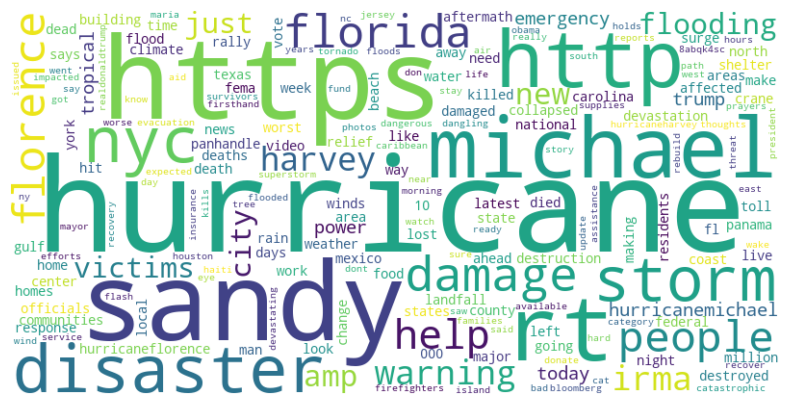

In [222]:
# function to make word cloud, I checked how to do that in chatgpt, and later I'm based on this. 
def generate_wordcloud(texts, ngram_range=(1, 1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(texts)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))
    
    # cloud 
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Usse for negative
generate_wordcloud(negative_tweets['tweet'], ngram_range=(1, 1))

### This cloud is showing mostly hurricane names, so I will remove them by creating my own stopwords.

In [223]:
my_stop_words = ["rt", "http", "https", "hurricane", "michael", "harvey", "sandy", "florence", "irma", "maria", "dorian", "amp", 
                  "tropical", "storm", "hurricanemichael", "hurricaneharvey", "hurricaneflorence", "hurricanesandy", "hurricaneirma", 
                 "hurricanedorian", "hurricanemaria", "panama", "mexico", "new", "houston", 'ã³â', "tx",
                 "jersey", "york", "florida", "carolina", "carolinas", "nyc", "texas", "nc", "_ã", "ā³â"]

<Figure size 640x480 with 0 Axes>

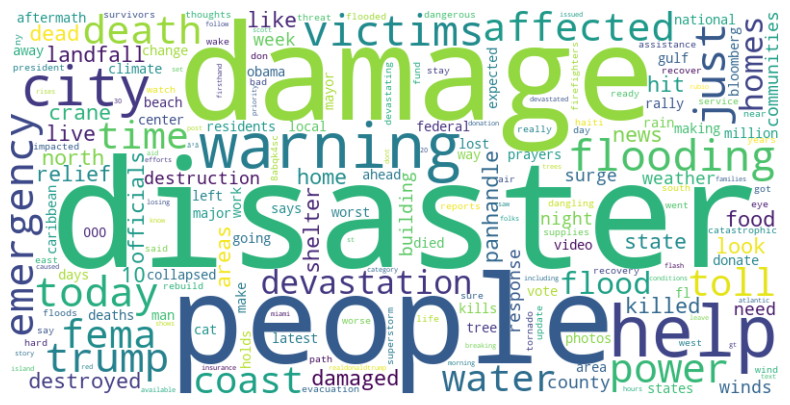

In [224]:
# generate new function to make word cloud without stop-words  
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

combined_stop_words = list(ENGLISH_STOP_WORDS) + my_stop_words

def generate_wordcloud(texts, stop_words, ngram_range=(1, 1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=combined_stop_words)
    X = vectorizer.fit_transform(texts)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))
    
    plt.savefig("all_hurricanes_cloud.png", format='png')
    
    # cloud 
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig("all_hurricanes_cloud.png", format='png')
    plt.show()
# Usse for negative
generate_wordcloud(negative_tweets['tweet'], stop_words=combined_stop_words, ngram_range=(1, 1))


In [225]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS  #english stop words

# combine my stop words with english stop words
combined_stop_words = list(ENGLISH_STOP_WORDS) + my_stop_words

# function to analyze most offten words
def top_n_words(texts, stop_words, ngram_range=(1, 1), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words)  # Passing combined stopwords list
    X = vectorizer.fit_transform(texts)  # Transform tekst to matrix
    
    # Count words occurence
    word_freq = X.sum(axis=0).A1  # sum word occurence
    words = vectorizer.get_feature_names_out()  # take names
    
    # Making dict
    word_freq_dict = dict(zip(words, word_freq))
    
    # Sort and take top
    sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_word_freq
    

sorted_ntweet_by_strength = top_n_words(negative_tweets['tweet'], combined_stop_words, ngram_range=(1, 1))


In [226]:
top_10_words = sorted_ntweet_by_strength[:10]
for word, freq in top_10_words:
    print(f"{word}: {freq}")

disaster: 561
damage: 441
people: 375
help: 328
city: 210
flooding: 209
just: 209
victims: 209
emergency: 190


<Figure size 640x480 with 0 Axes>

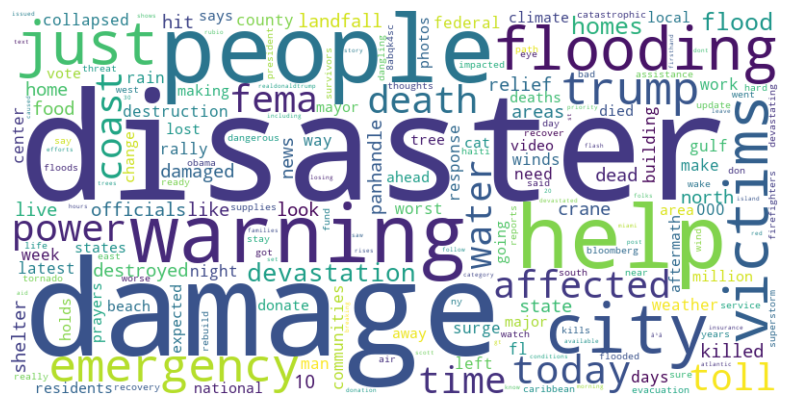

In [227]:
generate_wordcloud(negative_tweets['tweet'], combined_stop_words)

In [228]:
###########################################################################################################################################

In [229]:
##########################    This was for all hurricanes, now I will sort them by strength and messure sentimet     ######################

In [230]:
# Hurricanes Sorted by Strength:
# (Saffir-Simpson Hurricane Wind Scale)

# Hurricane Maria (2017) –- Category 5 -- (157 mph / 252 km/h)
# Hurricane Irma (2017) –- Category 5 -- (185 mph / 298 km/h)
# Hurricane Dorian (2019) –- Category 5 -- (185 mph / 298 km/h)
# Hurricane Michael (2018) –- Category 5 -- (160 mph / 257 km/h)
# Hurricane Harvey (2017) –- Category 4 -- (130 mph / 209 km/h)
# Hurricane Florence (2018) –- Category 1 -- (90 mph / 145 km/h)
# Hurricane Sandy (2012) –- Category 1 -- (80 mph / 130 km/h)

In [231]:
strength_label = {
    "maria": 5,
    "irma": 5,
    "dorian": 5,
    "michael": 5,
    "harvey": 4,
    "florence": 1,
    "sandy": 1
}
combined_df0['hurricane strength'] = combined_df0['Hurricane_name'].map(strength_label)
combined_df0

Hurricane_name                                              tweet  \
0               irma                      #Irma Relief Drive in Orlando   
1               irma  In Irma’s U.S. death toll, which Americans count?   
2               irma  Volunteers are regularly checking Irma shelter...   
3           florence  The thing to remember for eastern SC is that #...   
4           florence  The thing to remember for eastern SC is that #...   
...              ...                                                ...   
11444        michael  A Fighter Jet Flipped. Hangars Shredded. At Ty...   
11445        michael  President Trump provides an update on the resp...   
11446        michael  Just announced: The Walt Disney Company donate...   
11447        michael  Take a second today to say a prayer for everyo...   
11448        michael  i bet $100 that if @AndrewGillum was #Florida ...   

       fatalities  vader_sentiment sentiment  hurricane strength  
0              92           0.4767  Positive                   5  
1              92          -0.5994  Negative                   5  
2              92           0.0000   Neutral                   5  
3              54          -0.5574  Negative                   1  
4               4          -0.5574  Negative                   1  
...           ...              ...       ...                 ...  
11444          74           0.1531  Positive                   5  
11445          74           0.0000   Neutral                   5  
11446          74           0.0000   Neutral                   5  
11447          74           0.8720  Positive                   5  
11448          74          -0.5423  Negative                   5  

[11449 rows x 6 columns]

In [232]:
strength_5 = combined_df0[combined_df0['hurricane strength'] == 5]
strength_1 = combined_df0[combined_df0['hurricane strength'] == 1]

In [233]:
# Checking mean sentiment for hurricanes with strength 5:
average_sentiment_5 = strength_5['vader_sentiment'].mean()
average_sentiment_5 

-0.019991172091044458

In [234]:
# Checking mean sentiment for hurricanes with strength 1:
average_sentiment_1 = strength_1['vader_sentiment'].mean()
average_sentiment_1

-0.0029350060147791705

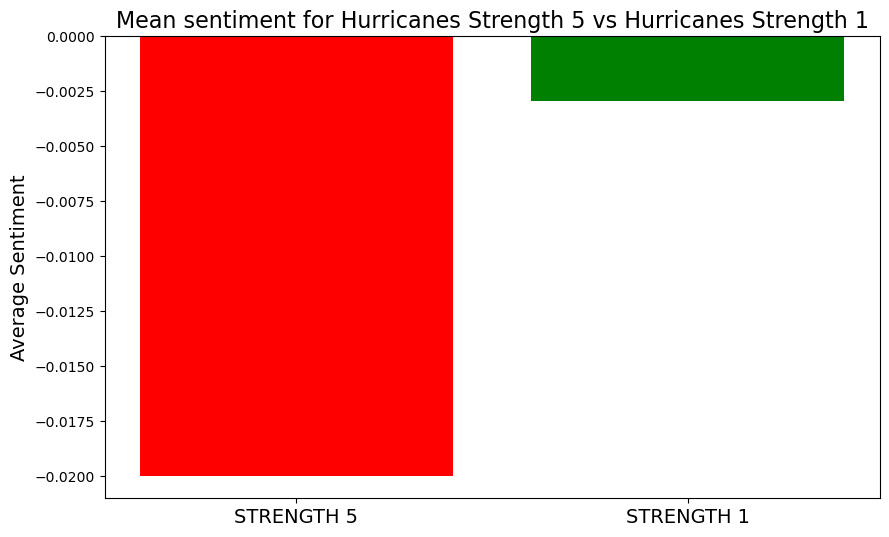

In [235]:
import matplotlib.pyplot as plt

categories = ['STRENGTH 5', 'STRENGTH 1']
sentiments = [average_sentiment_5, average_sentiment_1]
plt.figure(figsize=(10, 6))
plt.bar(categories, sentiments, color=['red', 'green'])

plt.title('Mean sentiment for Hurricanes Strength 5 vs Hurricanes Strength 1',fontsize=16)
plt.ylabel('Average Sentiment', fontsize=14)
plt.xticks(fontsize=14)

plt.savefig('hurricane_sentiment_5vs1.png', format='png')
plt.savefig('hurricane_sentiment_5vs1.jpg', format='jpg')
plt.show()


In [236]:
############################################ Sentiment reflecting hurricane strength ######################################################

In [237]:
# Filter for negative sentiment:
negative_strength_5 = strength_5[strength_5['vader_sentiment'] < 0]
negative_strength_1 = strength_1[strength_1['vader_sentiment'] < 0]

In [238]:
top_negative_for_strength_5 = top_n_words(negative_strength_5['tweet'], ngram_range=(1, 1), top_n=10, stop_words = combined_stop_words)
top_negative_for_strength_5[:10]

[('disaster', 493),
 ('help', 306),
 ('warning', 298),
 ('damage', 200),
 ('people', 180),
 ('trump', 154),
 ('today', 143),
 ('just', 135),
 ('fema', 130),
 ('victims', 130)]

<Figure size 640x480 with 0 Axes>

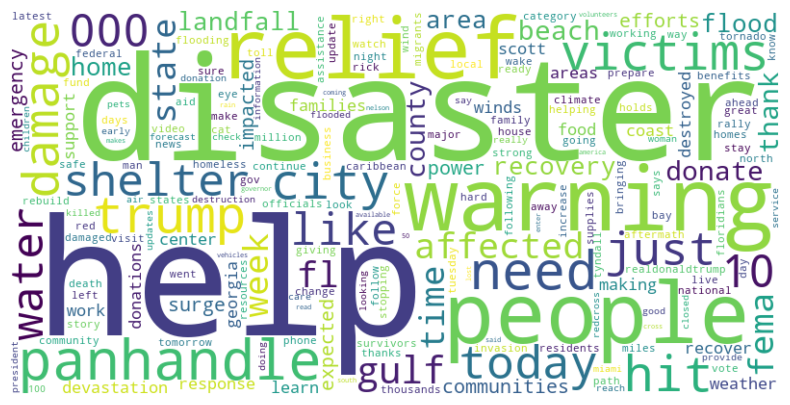

<Figure size 640x480 with 0 Axes>

In [239]:
generate_wordcloud(strength_5['tweet'], combined_stop_words)
plt.savefig('wordcloud_5_strenght.png', format='png', dpi=300)

In [240]:
top_negative_for_strength_1 = top_n_words(negative_strength_1['tweet'], ngram_range=(1, 1), top_n=10, stop_words = combined_stop_words)
top_negative_for_strength_1[:10]

[('people', 176),
 ('damage', 175),
 ('power', 120),
 ('crane', 119),
 ('flooding', 114),
 ('time', 95),
 ('city', 93),
 ('look', 84),
 ('building', 79),
 ('collapsed', 77)]

<Figure size 640x480 with 0 Axes>

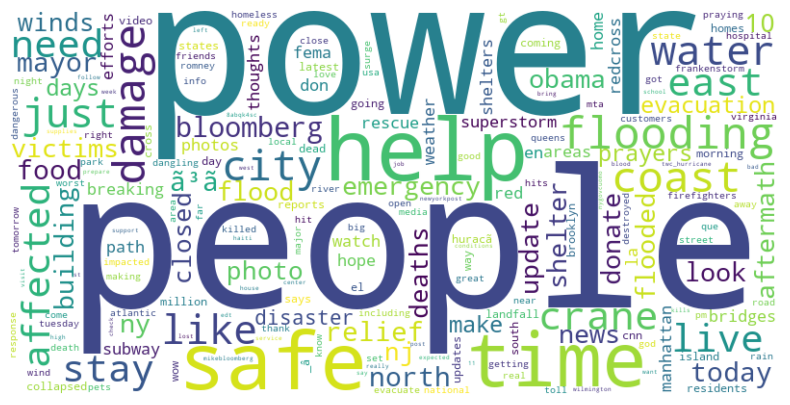

In [241]:
plt.savefig('wordcloud_1_strenght.png', format='png', dpi=300)
generate_wordcloud(strength_1['tweet'], combined_stop_words)

In [242]:
combined_df0.head()

Hurricane_name                                              tweet  \
0           irma                      #Irma Relief Drive in Orlando   
1           irma  In Irma’s U.S. death toll, which Americans count?   
2           irma  Volunteers are regularly checking Irma shelter...   
3       florence  The thing to remember for eastern SC is that #...   
4       florence  The thing to remember for eastern SC is that #...   

   fatalities  vader_sentiment sentiment  hurricane strength  
0          92           0.4767  Positive                   5  
1          92          -0.5994  Negative                   5  
2          92           0.0000   Neutral                   5  
3          54          -0.5574  Negative                   1  
4           4          -0.5574  Negative                   1

In [243]:
################################################## Model to predict hurricane strength ####################################################

In [244]:
hurricane_strength_df = combined_df0[['tweet', 'hurricane strength']].copy()
hurricane_strength_df

tweet  hurricane strength
0                          #Irma Relief Drive in Orlando                   5
1      In Irma’s U.S. death toll, which Americans count?                   5
2      Volunteers are regularly checking Irma shelter...                   5
3      The thing to remember for eastern SC is that #...                   1
4      The thing to remember for eastern SC is that #...                   1
...                                                  ...                 ...
11444  A Fighter Jet Flipped. Hangars Shredded. At Ty...                   5
11445  President Trump provides an update on the resp...                   5
11446  Just announced: The Walt Disney Company donate...                   5
11447  Take a second today to say a prayer for everyo...                   5
11448  i bet $100 that if @AndrewGillum was #Florida ...                   5

[11449 rows x 2 columns]

In [245]:
vectorizer = CountVectorizer(stop_words=combined_stop_words)

X_hurricane_strength = vectorizer.fit_transform(hurricane_strength_df['tweet'])
y_hurricane_strength = hurricane_strength_df['hurricane strength']

In [246]:
X_train_hur, X_test_hur, y_train_hur, y_test_hur = train_test_split(X_hurricane_strength, y_hurricane_strength, 
                                                                                            test_size=0.2, random_state=42)

In [247]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_hurricane_strength = DecisionTreeRegressor(random_state=42)

tree_hurricane_strength.fit(X_train_hur, y_train_hur)

y_pred_hur = tree_hurricane_strength.predict(X_test_hur)

mse_hurricane = mean_squared_error(y_test_hur, y_pred_hur)
print(f'mean_squared_error: {mse_hurricane}')

# closer to 0 mean_squared_error is better. Perfect model will be 0. 

from sklearn.metrics import r2_score

r2 = r2_score(y_test_hur, y_pred_hur)
print(f'R²: {r2}')

# this R2 how good is model with explaining datas, 0.51 it's 51% etc 
# mean_squared_error: 1.930655021834061 this suggest overfitting

mean_squared_error: 1.8745327510917031
R²: 0.4983252121476879


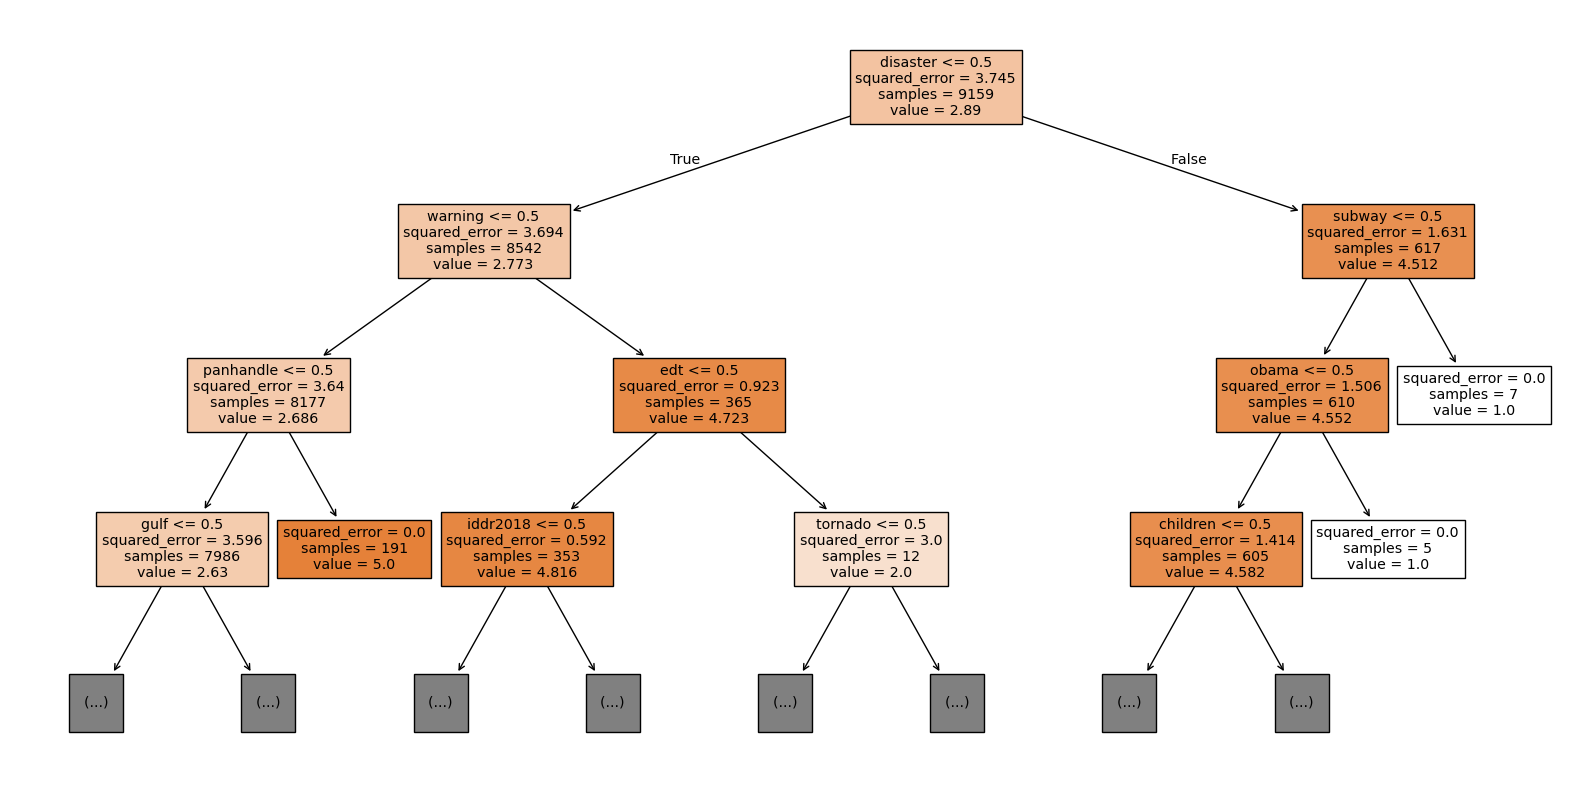

In [248]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_hurricane_strength, filled=True, feature_names=vectorizer.get_feature_names_out(), max_depth=3)
plt.show()

In [249]:
###########################################################################################################################################

In [250]:
###############################################       Hurricanes in order by costs      ###################################################

In [251]:
combined_df2.head()

Hurricane_name                                              tweet  \
0           irma                      #Irma Relief Drive in Orlando   
1           irma  In Irma’s U.S. death toll, which Americans count?   
2           irma  Volunteers are regularly checking Irma shelter...   
3       florence  The thing to remember for eastern SC is that #...   
4       florence  The thing to remember for eastern SC is that #...   

   index_column  fatalities  
0          2880          92  
1          3045          92  
2          3046          92  
3           925          54  
4           925           4

In [252]:
combined_df2.drop(columns = ["index_column"], inplace = True)
combined_df2.head()

Hurricane_name                                              tweet  \
0           irma                      #Irma Relief Drive in Orlando   
1           irma  In Irma’s U.S. death toll, which Americans count?   
2           irma  Volunteers are regularly checking Irma shelter...   
3       florence  The thing to remember for eastern SC is that #...   
4       florence  The thing to remember for eastern SC is that #...   

   fatalities  
0          92  
1          92  
2          92  
3          54  
4           4

In [253]:
# Very High Costs (group 3):

# Harvey ($125 billion)
# Maria ($90 billion)
# Sandy ($70 billion)

# High Costs (group 2):

# Irma ($50 billion)
# Michael ($25 billion)

# Medium Costs (group 1): 

# Florence ($24 billion)
# Dorian ($7-10 billion)

In [254]:
damage_group = {
    "maria": "group 3",
    "irma": "group 2",
    "dorian": "group 1",
    "michael": "group 2",
    "harvey": "group 3",
    "florence": "group 1",
    "sandy": "group 3"
}

combined_df2['damage_group'] = combined_df2['Hurricane_name'].map(damage_group)
combined_df2

Hurricane_name                                              tweet  \
0               irma                      #Irma Relief Drive in Orlando   
1               irma  In Irma’s U.S. death toll, which Americans count?   
2               irma  Volunteers are regularly checking Irma shelter...   
3           florence  The thing to remember for eastern SC is that #...   
4           florence  The thing to remember for eastern SC is that #...   
...              ...                                                ...   
11444        michael  A Fighter Jet Flipped. Hangars Shredded. At Ty...   
11445        michael  President Trump provides an update on the resp...   
11446        michael  Just announced: The Walt Disney Company donate...   
11447        michael  Take a second today to say a prayer for everyo...   
11448        michael  i bet $100 that if @AndrewGillum was #Florida ...   

       fatalities damage_group  
0              92      group 2  
1              92      group 2  
2              92      group 2  
3              54      group 1  
4               4      group 1  
...           ...          ...  
11444          74      group 2  
11445          74      group 2  
11446          74      group 2  
11447          74      group 2  
11448          74      group 2  

[11449 rows x 4 columns]

In [255]:
analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [256]:
combined_df2['vader_score'] = combined_df2['tweet'].apply(get_vader_sentiment)

In [257]:
combined_df2.head()

Hurricane_name                                              tweet  \
0           irma                      #Irma Relief Drive in Orlando   
1           irma  In Irma’s U.S. death toll, which Americans count?   
2           irma  Volunteers are regularly checking Irma shelter...   
3       florence  The thing to remember for eastern SC is that #...   
4       florence  The thing to remember for eastern SC is that #...   

   fatalities damage_group  vader_score  
0          92      group 2       0.4767  
1          92      group 2      -0.5994  
2          92      group 2       0.0000  
3          54      group 1      -0.5574  
4           4      group 1      -0.5574

In [258]:
average_sentiment_by_group = combined_df2.groupby('damage_group')['vader_score'].mean()
average_sentiment_by_group
# 3 - very high, 2 - medium high, 1 - medium -> damage costs

damage_group
group 1    0.073838
group 2   -0.019991
group 3   -0.013772
Name: vader_score, dtype: float64

Exception during reset or similar
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sqlalchemy/pool/base.py", line 986, in _finalize_fairy
    fairy._reset(
  File "/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sqlalchemy/pool/base.py", line 1432, in _reset
    pool._dialect.do_rollback(self)
  File "/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sqlalchemy/engine/default.py", line 700, in do_rollback
    dbapi_connection.rollback()
psycopg2.OperationalError: server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.



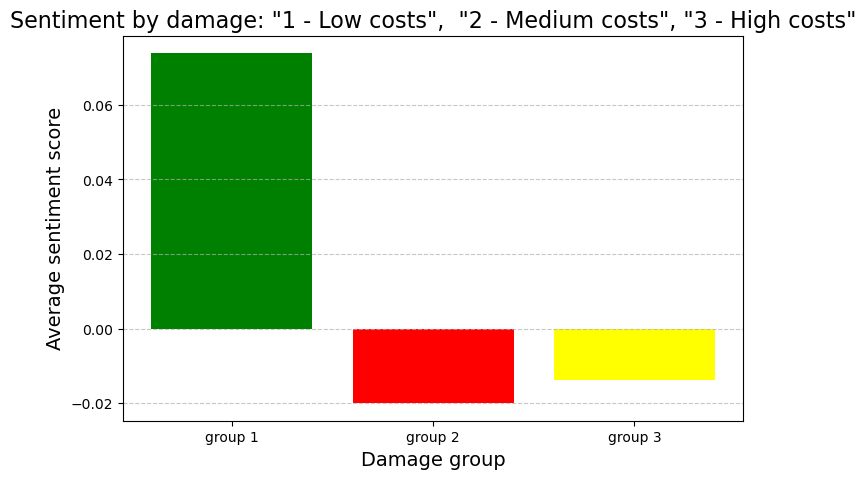

In [262]:
# Colors for group 1, 2, 3
colors = ['green', 'red', 'yellow']

plt.figure(figsize=(8, 5))
plt.bar(average_sentiment_by_group.index, average_sentiment_by_group, color=colors)

plt.title('Sentiment by damage: "1 - Low costs",  "2 - Medium costs", "3 - High costs"', fontsize=16)
plt.xlabel('Damage group', fontsize=14)
plt.ylabel('Average sentiment score', fontsize=14)

# Adding grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show
plt.savefig('hurricane_sentiment_damage.png', format='png')

In [263]:
ordered_groups_list = ['group 1', 'group 2', 'group 3']

unigram_vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=combined_stop_words)

for group in ordered_groups_list:
    print(f"\nTop 10 Unigrams for {group}:")
    
    group_data_subset = combined_df2[combined_df2['damage_group'] == group]
    
    unigram_matrix = unigram_vectorizer.fit_transform(group_data_subset['tweet'])
    
    word_frequency = unigram_matrix.sum(axis=0).A1
    unigram_features = unigram_vectorizer.get_feature_names_out()
    
    word_frequency_dict = dict(zip(unigram_features, word_frequency))
    
    sorted_word_frequency = sorted(word_frequency_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    
    for word, freq in sorted_word_frequency:
        print(f"{word}: {freq}")


Top 10 Unigrams for group 1:
help: 168
flooding: 148
water: 114
north: 112
food: 104
relief: 96
damage: 90
emergency: 90
rescue: 90
people: 88

Top 10 Unigrams for group 2:
help: 904
disaster: 702
people: 397
relief: 391
panhandle: 295
need: 263
trump: 247
victims: 238
hit: 232

Top 10 Unigrams for group 3:
people: 260
power: 247
help: 239
damage: 197
time: 197
city: 181
safe: 178
flooding: 173
crane: 162
just: 151


Cloud for group 1 with: (1, 2)


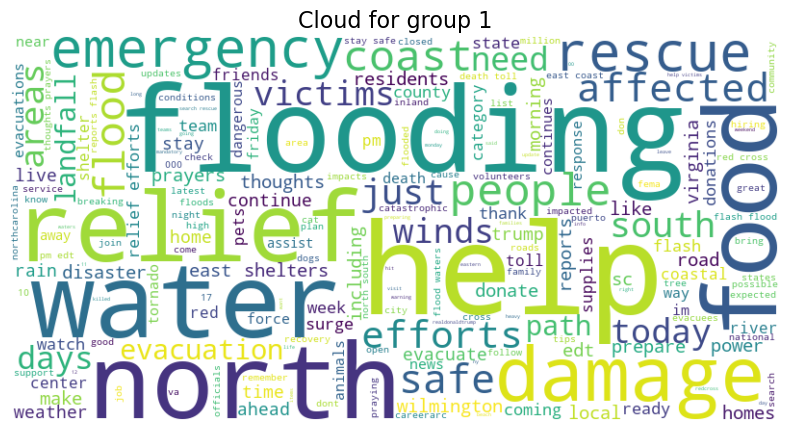

Cloud for group 2 with: (1, 2)


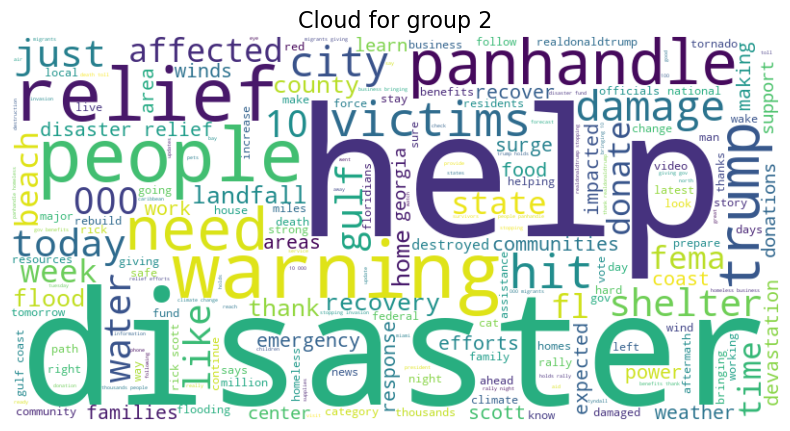

Cloud for group 3 with: (1, 2)


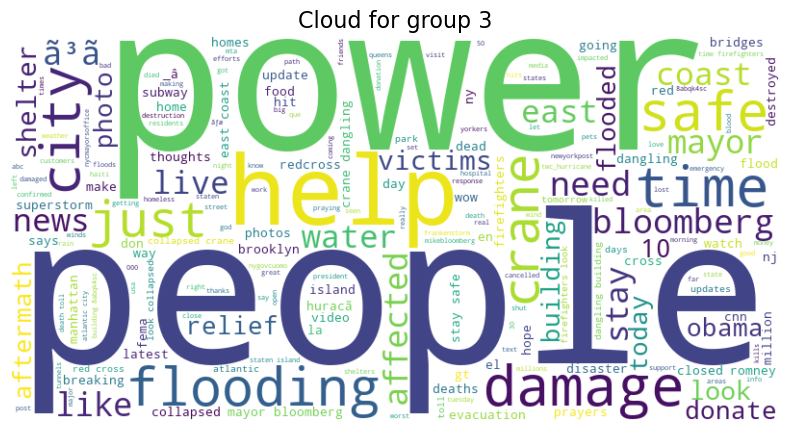

In [266]:
ordered_groups_list = ['group 1', 'group 2', 'group 3'] 
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words=combined_stop_words)

for group in ordered_groups_list:
    print(f"Cloud for {group} with: {(1, 2)}")
    
    group_data_subset = combined_df2[combined_df2['damage_group'] == group]
    
    ngram_matrix = vectorizer.fit_transform(group_data_subset['tweet'])
    
    word_frequency = ngram_matrix.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()
    
    word_frequency_dict = dict(zip(ngram_features, word_frequency))
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency_dict)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cloud for {group}", fontsize=16)
    plt.show()

Cloud for group 1 with: (2, 2)


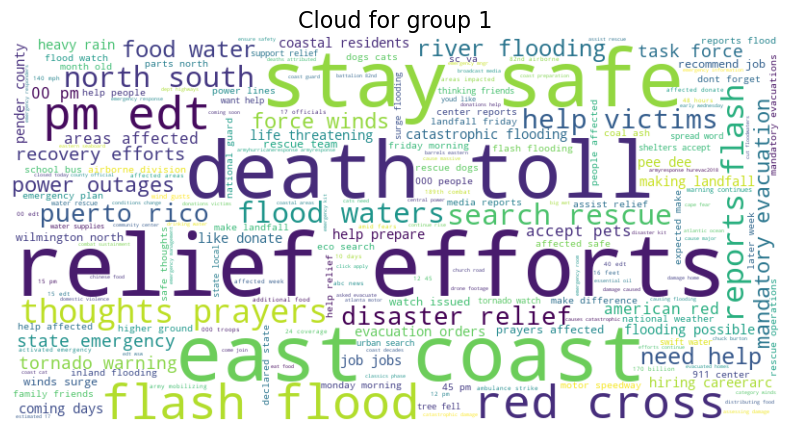

Cloud for group 2 with: (2, 2)


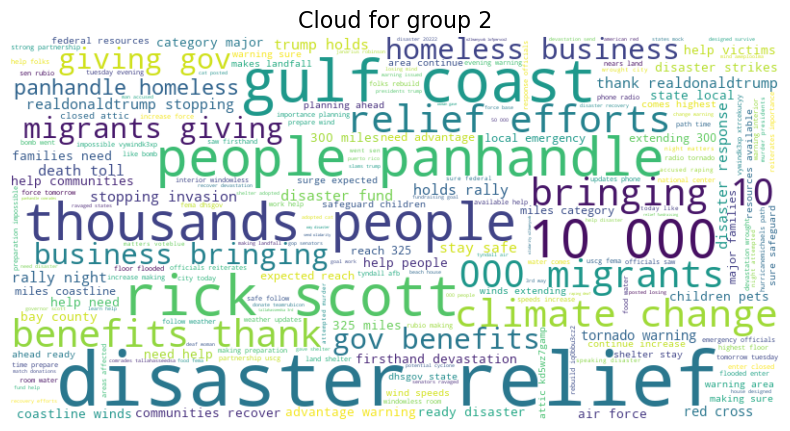

Cloud for group 3 with: (2, 2)


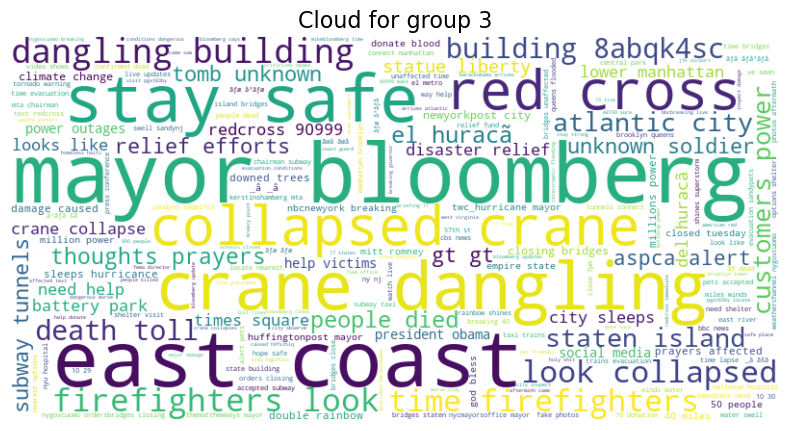

In [267]:
generate_wordcloud_for_groups(combined_df2, 'damage_group', ngram_range=(2, 2), stop_words=combined_stop_words)

In [268]:
#################################             It was mostly for clouds and sentiment                 ######################################

In [269]:
###########################################################################################################################################

In [270]:
###########################################################################################################################################

In [271]:
#################################                      Decission Trees Part                          ###################################### 

In [272]:
my_stop_words = ["rt", "http", "https", "hurricane", "michael", "harvey", "sandy", "florence", "irma", "maria", "dorian", "amp", 
                  "tropical", "storm", "hurricanemichael", "hurricaneharvey", "hurricaneflorence", "hurricanesandy", "hurricaneirma", 
                 "hurricanedorian", "hurricanemaria", "panama", "mexico", "new", "houston", "tx", 
                 "jersey", "york", "florida", "carolina", "carolinas", "nyc", "texas", "nc", "_ã", "ā³â", "edt"]

In [273]:
combined_stop_words = list(ENGLISH_STOP_WORDS) + my_stop_words

In [274]:
copy_to_work_with_trees_df.head()

landfall_city    lat    lon landfall_pop_dens_sq_mile  \
0        Tampa, FL  27.95 -82.46                      1500   
1  Panama City, FL  30.16 -85.66                      1100   
2     Big Bend, FL  29.85 -83.59                      1200   
3   Fort Myers, FL  26.64 -81.87                      1400   
4   Vero Beach, FL  27.64 -80.39                      1100   

        pathway_towns pathway_town_population_densities  fatalities  \
0  St. Petersburg, FL                              4200          75   
1     Tallahassee, FL                              1900          60   
2     Tallahassee, FL                              1900          27   
3         Orlando, FL                              1200         148   
4         Orlando, FL                              1200          10   

   max_wind_speed_mph  pressure_mb  storm_surge_ft  Precipitation_Total_in  \
0                 140          950              10                      36   
1                 130          960               8                      30   
2                 130          950              12                      32   
3                 155          937              18                      45   
4                  75          985               6                      30   

  Hurricane_name Hurricane_year  
0        Milton            2024  
1        Helene            2024  
2        Idalia            2023  
3           Ian            2022  
4        Nicole            2022

In [275]:
copy_to_work_with_trees_df2 = copy_to_work_with_trees_df.copy()

In [276]:
copy_to_work_with_trees_df.isnull().sum()

landfall_city                        0
lat                                  0
lon                                  0
landfall_pop_dens_sq_mile            0
pathway_towns                        0
pathway_town_population_densities    0
fatalities                           0
max_wind_speed_mph                   0
pressure_mb                          0
storm_surge_ft                       0
Precipitation_Total_in               0
Hurricane_name                       0
Hurricane_year                       0
dtype: int64

In [279]:
tweets = getDFFromTable("all_hurricanes_all")
tweets.head()

hurricane_name                                              tweet  \
0         Dorian  Everywhere else during a hurricane: lets get f...   
1         Dorian  Hurricane #Dorian is currently over the Abaco ...   
2         Dorian  Terrible situation unfolding for the Bahamas. ...   
3         Dorian  absolutely gutted about what #HopeTown and the...   
4         Dorian           Happy Dorian Eve! Prepare for the worst!   

   index_column  
0             0  
1             1  
2             2  
3             3  
4             4

In [280]:
tweets.rename(columns = {"hurricane_name" : "Hurricane_name"}, inplace = True)

In [281]:
#tweets.drop(columns = ["index_column"], inplace = True)

In [282]:
tweets.head()

Hurricane_name                                              tweet  \
0         Dorian  Everywhere else during a hurricane: lets get f...   
1         Dorian  Hurricane #Dorian is currently over the Abaco ...   
2         Dorian  Terrible situation unfolding for the Bahamas. ...   
3         Dorian  absolutely gutted about what #HopeTown and the...   
4         Dorian           Happy Dorian Eve! Prepare for the worst!   

   index_column  
0             0  
1             1  
2             2  
3             3  
4             4

In [283]:
tweets["Hurricane_name"] = tweets["Hurricane_name"].str.strip().str.lower()
copy_to_work_with_trees_df["Hurricane_name"] = copy_to_work_with_trees_df["Hurricane_name"].str.strip().str.lower()

In [284]:
copy_to_work_3_tweets = tweets.copy()

In [285]:
fatality_tweets = tweets.merge(copy_to_work_with_trees_df[["fatalities", "Hurricane_name", "max_wind_speed_mph"]], on="Hurricane_name", how="inner")
fatality_tweets

Hurricane_name                                              tweet  \
0               irma                      #Irma Relief Drive in Orlando   
1               irma  In Irma’s U.S. death toll, which Americans count?   
2               irma  Volunteers are regularly checking Irma shelter...   
3           florence  The thing to remember for eastern SC is that #...   
4           florence  The thing to remember for eastern SC is that #...   
...              ...                                                ...   
11444        michael  A Fighter Jet Flipped. Hangars Shredded. At Ty...   
11445        michael  President Trump provides an update on the resp...   
11446        michael  Just announced: The Walt Disney Company donate...   
11447        michael  Take a second today to say a prayer for everyo...   
11448        michael  i bet $100 that if @AndrewGillum was #Florida ...   

       index_column  fatalities  max_wind_speed_mph  
0              2880          92                 185  
1              3045          92                 185  
2              3046          92                 185  
3               925          54                 140  
4               925           4                  65  
...             ...         ...                 ...  
11444         12323          74                 160  
11445         12324          74                 160  
11446         12325          74                 160  
11447         12326          74                 160  
11448         12327          74                 160  

[11449 rows x 5 columns]

In [286]:
# This part TA Andrew Smigaj help me to create and explain how to do it this way: 

In [287]:
fatality_tweets['fatal_class'] = pd.qcut(fatality_tweets['fatalities'], 2, duplicates="raise")
fatality_tweets['fatal_class'].value_counts()

fatal_class
(3.999, 92.0]    5979
(92.0, 233.0]    5470
Name: count, dtype: int64

In [288]:
fatality_tweets["wind_bins"] = pd.qcut(fatality_tweets["fatalities"], 2)
fatality_tweets_dummies = pd.get_dummies(fatality_tweets, columns=['wind_bins'], dtype = int)
fatality_tweets_dummies

Hurricane_name                                              tweet  \
0               irma                      #Irma Relief Drive in Orlando   
1               irma  In Irma’s U.S. death toll, which Americans count?   
2               irma  Volunteers are regularly checking Irma shelter...   
3           florence  The thing to remember for eastern SC is that #...   
4           florence  The thing to remember for eastern SC is that #...   
...              ...                                                ...   
11444        michael  A Fighter Jet Flipped. Hangars Shredded. At Ty...   
11445        michael  President Trump provides an update on the resp...   
11446        michael  Just announced: The Walt Disney Company donate...   
11447        michael  Take a second today to say a prayer for everyo...   
11448        michael  i bet $100 that if @AndrewGillum was #Florida ...   

       index_column  fatalities  max_wind_speed_mph    fatal_class  \
0              2880          92                 185  (3.999, 92.0]   
1              3045          92                 185  (3.999, 92.0]   
2              3046          92                 185  (3.999, 92.0]   
3               925          54                 140  (3.999, 92.0]   
4               925           4                  65  (3.999, 92.0]   
...             ...         ...                 ...            ...   
11444         12323          74                 160  (3.999, 92.0]   
11445         12324          74                 160  (3.999, 92.0]   
11446         12325          74                 160  (3.999, 92.0]   
11447         12326          74                 160  (3.999, 92.0]   
11448         12327          74                 160  (3.999, 92.0]   

       wind_bins_(3.999, 92.0]  wind_bins_(92.0, 233.0]  
0                            1                        0  
1                            1                        0  
2                            1                        0  
3                            1                        0  
4                            1                        0  
...                        ...                      ...  
11444                        1                        0  
11445                        1                        0  
11446                        1                        0  
11447                        1                        0  
11448                        1                        0  

[11449 rows x 8 columns]

In [289]:
vectorizer = CountVectorizer(stop_words= combined_stop_words)

X = vectorizer.fit_transform(fatality_tweets['tweet'])
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X_df

00  000  000lbs  000s  00a  00am  00giaaq2ne  00pm  01  01234  ...  \
0       0    0       0     0    0     0           0     0   0      0  ...   
1       0    0       0     0    0     0           0     0   0      0  ...   
2       0    0       0     0    0     0           0     0   0      0  ...   
3       0    0       0     0    0     0           0     0   0      0  ...   
4       0    0       0     0    0     0           0     0   0      0  ...   
...    ..  ...     ...   ...  ...   ...         ...   ...  ..    ...  ...   
11444   0    0       0     0    0     0           0     0   0      0  ...   
11445   0    0       0     0    0     0           0     0   0      0  ...   
11446   0    0       0     0    0     0           0     0   0      0  ...   
11447   0    0       0     0    0     0           0     0   0      0  ...   
11448   0    0       0     0    0     0           0     0   0      0  ...   

       请务必提高警惕  超人気防災セット  軌道  防災セットラピタ  高波  경계가필요합니다  기상  일본  정보  트릭아이뮤지엄  
0            0         0   0         0   0         0   0   0   0        0  
1            0         0   0         0   0         0   0   0   0        0  
2            0         0   0         0   0         0   0   0   0        0  
3            0         0   0         0   0         0   0   0   0        0  
4            0         0   0         0   0         0   0   0   0        0  
...        ...       ...  ..       ...  ..       ...  ..  ..  ..      ...  
11444        0         0   0         0   0         0   0   0   0        0  
11445        0         0   0         0   0         0   0   0   0        0  
11446        0         0   0         0   0         0   0   0   0        0  
11447        0         0   0         0   0         0   0   0   0        0  
11448        0         0   0         0   0         0   0   0   0        0  

[11449 rows x 21343 columns]

In [290]:
X_df["high_wind"] = fatality_tweets_dummies["wind_bins_(3.999, 92.0]"]
X_df["low_wind"] = fatality_tweets_dummies["wind_bins_(92.0, 233.0]"]
X_df

00  000  000lbs  000s  00a  00am  00giaaq2ne  00pm  01  01234  ...  軌道  \
0       0    0       0     0    0     0           0     0   0      0  ...   0   
1       0    0       0     0    0     0           0     0   0      0  ...   0   
2       0    0       0     0    0     0           0     0   0      0  ...   0   
3       0    0       0     0    0     0           0     0   0      0  ...   0   
4       0    0       0     0    0     0           0     0   0      0  ...   0   
...    ..  ...     ...   ...  ...   ...         ...   ...  ..    ...  ...  ..   
11444   0    0       0     0    0     0           0     0   0      0  ...   0   
11445   0    0       0     0    0     0           0     0   0      0  ...   0   
11446   0    0       0     0    0     0           0     0   0      0  ...   0   
11447   0    0       0     0    0     0           0     0   0      0  ...   0   
11448   0    0       0     0    0     0           0     0   0      0  ...   0   

       防災セットラピタ  高波  경계가필요합니다  기상  일본  정보  트릭아이뮤지엄  high_wind  low_wind  
0             0   0         0   0   0   0        0          1         0  
1             0   0         0   0   0   0        0          1         0  
2             0   0         0   0   0   0        0          1         0  
3             0   0         0   0   0   0        0          1         0  
4             0   0         0   0   0   0        0          1         0  
...         ...  ..       ...  ..  ..  ..      ...        ...       ...  
11444         0   0         0   0   0   0        0          1         0  
11445         0   0         0   0   0   0        0          1         0  
11446         0   0         0   0   0   0        0          1         0  
11447         0   0         0   0   0   0        0          1         0  
11448         0   0         0   0   0   0        0          1         0  

[11449 rows x 21345 columns]

In [291]:
X_train = X_df.loc[fatality_tweets["Hurricane_name"] != "michael"]
y_train = fatality_tweets.loc[fatality_tweets["Hurricane_name"] != "michael"]["fatalities"]
X_train

00  000  000lbs  000s  00a  00am  00giaaq2ne  00pm  01  01234  ...  軌道  \
0      0    0       0     0    0     0           0     0   0      0  ...   0   
1      0    0       0     0    0     0           0     0   0      0  ...   0   
2      0    0       0     0    0     0           0     0   0      0  ...   0   
3      0    0       0     0    0     0           0     0   0      0  ...   0   
4      0    0       0     0    0     0           0     0   0      0  ...   0   
...   ..  ...     ...   ...  ...   ...         ...   ...  ..    ...  ...  ..   
7703   0    0       0     0    0     0           0     0   0      0  ...   0   
7704   0    0       0     0    0     0           0     0   0      0  ...   0   
7705   0    0       0     0    0     0           0     0   0      0  ...   0   
7706   0    0       0     0    0     0           0     0   0      0  ...   0   
7707   0    0       0     0    0     0           0     0   0      0  ...   0   

      防災セットラピタ  高波  경계가필요합니다  기상  일본  정보  트릭아이뮤지엄  high_wind  low_wind  
0            0   0         0   0   0   0        0          1         0  
1            0   0         0   0   0   0        0          1         0  
2            0   0         0   0   0   0        0          1         0  
3            0   0         0   0   0   0        0          1         0  
4            0   0         0   0   0   0        0          1         0  
...        ...  ..       ...  ..  ..  ..      ...        ...       ...  
7703         0   0         0   0   0   0        0          0         1  
7704         0   0         0   0   0   0        0          0         1  
7705         0   0         0   0   0   0        0          0         1  
7706         0   0         0   0   0   0        0          0         1  
7707         0   0         0   0   0   0        0          0         1  

[7706 rows x 21345 columns]

In [292]:
X_test = X_df.loc[fatality_tweets["Hurricane_name"] == "michael"]

y_test = fatality_tweets.loc[fatality_tweets["Hurricane_name"] == "michael"]["fatalities"]
y_test

7516     74
7566     74
7708     74
7709     74
7710     74
         ..
11444    74
11445    74
11446    74
11447    74
11448    74
Name: fatalities, Length: 3743, dtype: int64

In [293]:
X_test

00  000  000lbs  000s  00a  00am  00giaaq2ne  00pm  01  01234  ...  軌道  \
7516    0    0       0     0    0     0           0     0   0      0  ...   0   
7566    0    0       0     0    0     0           0     0   0      0  ...   0   
7708    0    0       0     0    0     0           0     0   0      0  ...   0   
7709    0    0       0     0    0     0           0     0   0      0  ...   0   
7710    0    0       0     0    0     0           0     0   0      0  ...   0   
...    ..  ...     ...   ...  ...   ...         ...   ...  ..    ...  ...  ..   
11444   0    0       0     0    0     0           0     0   0      0  ...   0   
11445   0    0       0     0    0     0           0     0   0      0  ...   0   
11446   0    0       0     0    0     0           0     0   0      0  ...   0   
11447   0    0       0     0    0     0           0     0   0      0  ...   0   
11448   0    0       0     0    0     0           0     0   0      0  ...   0   

       防災セットラピタ  高波  경계가필요합니다  기상  일본  정보  트릭아이뮤지엄  high_wind  low_wind  
7516          0   0         0   0   0   0        0          1         0  
7566          0   0         0   0   0   0        0          1         0  
7708          0   0         0   0   0   0        0          1         0  
7709          0   0         0   0   0   0        0          1         0  
7710          0   0         0   0   0   0        0          1         0  
...         ...  ..       ...  ..  ..  ..      ...        ...       ...  
11444         0   0         0   0   0   0        0          1         0  
11445         0   0         0   0   0   0        0          1         0  
11446         0   0         0   0   0   0        0          1         0  
11447         0   0         0   0   0   0        0          1         0  
11448         0   0         0   0   0   0        0          1         0  

[3743 rows x 21345 columns]

In [294]:
y = fatality_tweets['fatalities']

In [295]:
#X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=42)

In [296]:
regressor = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=10, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=10,
                      random_state=42)

In [297]:
y_prediction = regressor.predict(X_test)

In [298]:
mse = mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 359.1741912199661


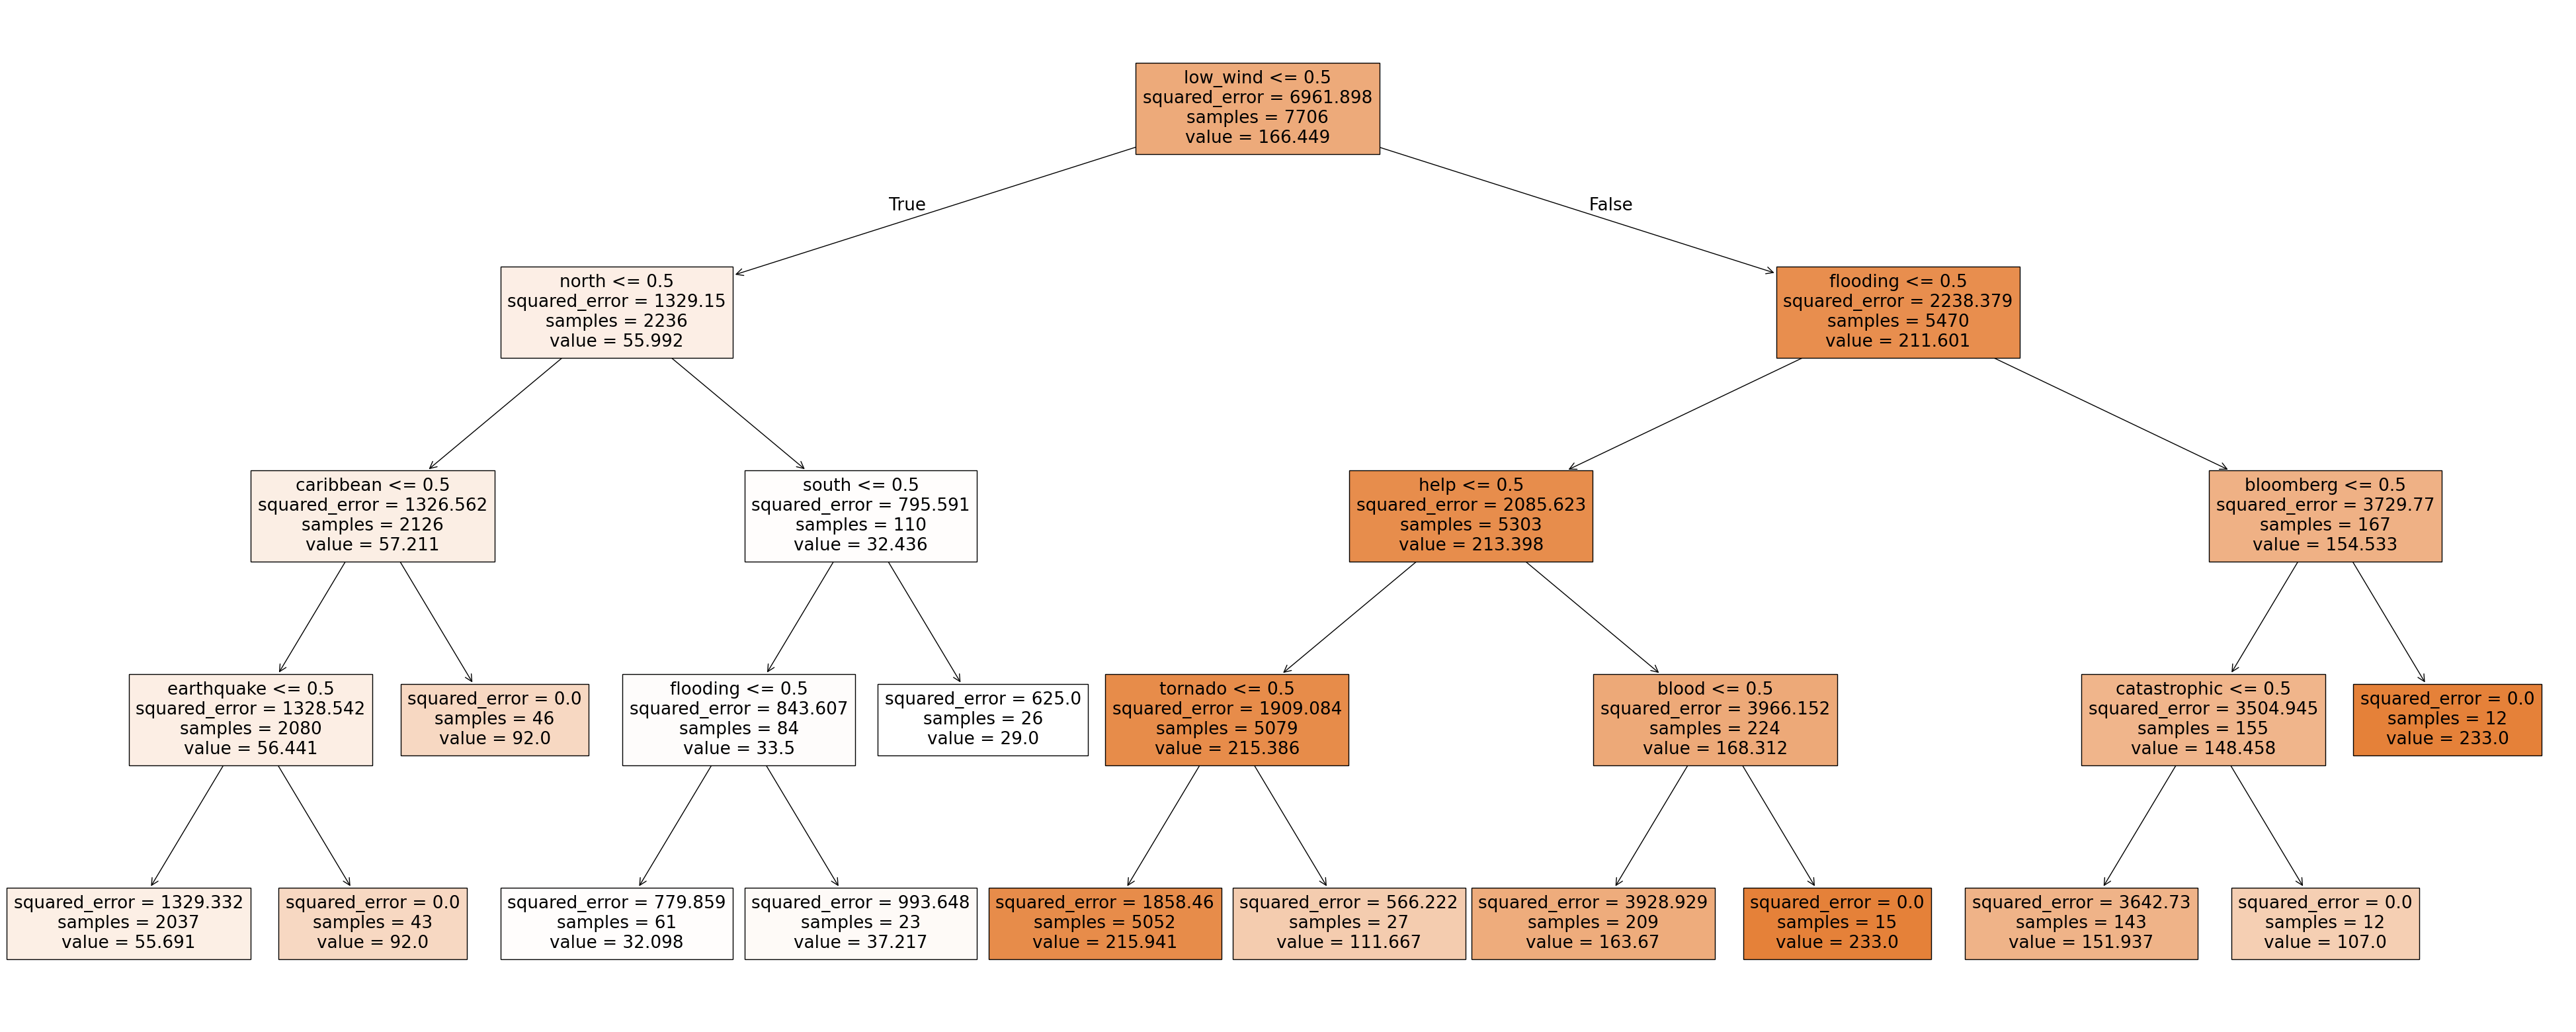

In [299]:
plt.figure(figsize=(50, 20))
plot_tree(regressor, filled=True, feature_names=X_df.columns, max_depth=8)
plt.show()

In [300]:
# snippet generated by chatGPT
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # How to read this results: (I cited chat gpt)
# MAPE = 0%: Ideal model where the predictions are perfect (no errors).
# MAPE close to 0%: A very good model with low prediction error.
# MAPE above 100%: The model has a very large error and is not a good predictor.

In [301]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_prediction)

18.951891494517536

In [302]:
mean_absolute_percentage_error(y_test, y_prediction)

25.2726999633207

In [303]:
regressor.score(X_test, y_test)

0.0

In [304]:
###########################################################################################################################################

In [305]:
# Or if I will do train test split instead of pulling out michel:

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=42)

In [307]:
regressor = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=10, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=10,
                      random_state=42)

In [308]:
y_prediction = regressor.predict(X_test)

In [309]:
mse = mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1258.2372942611544


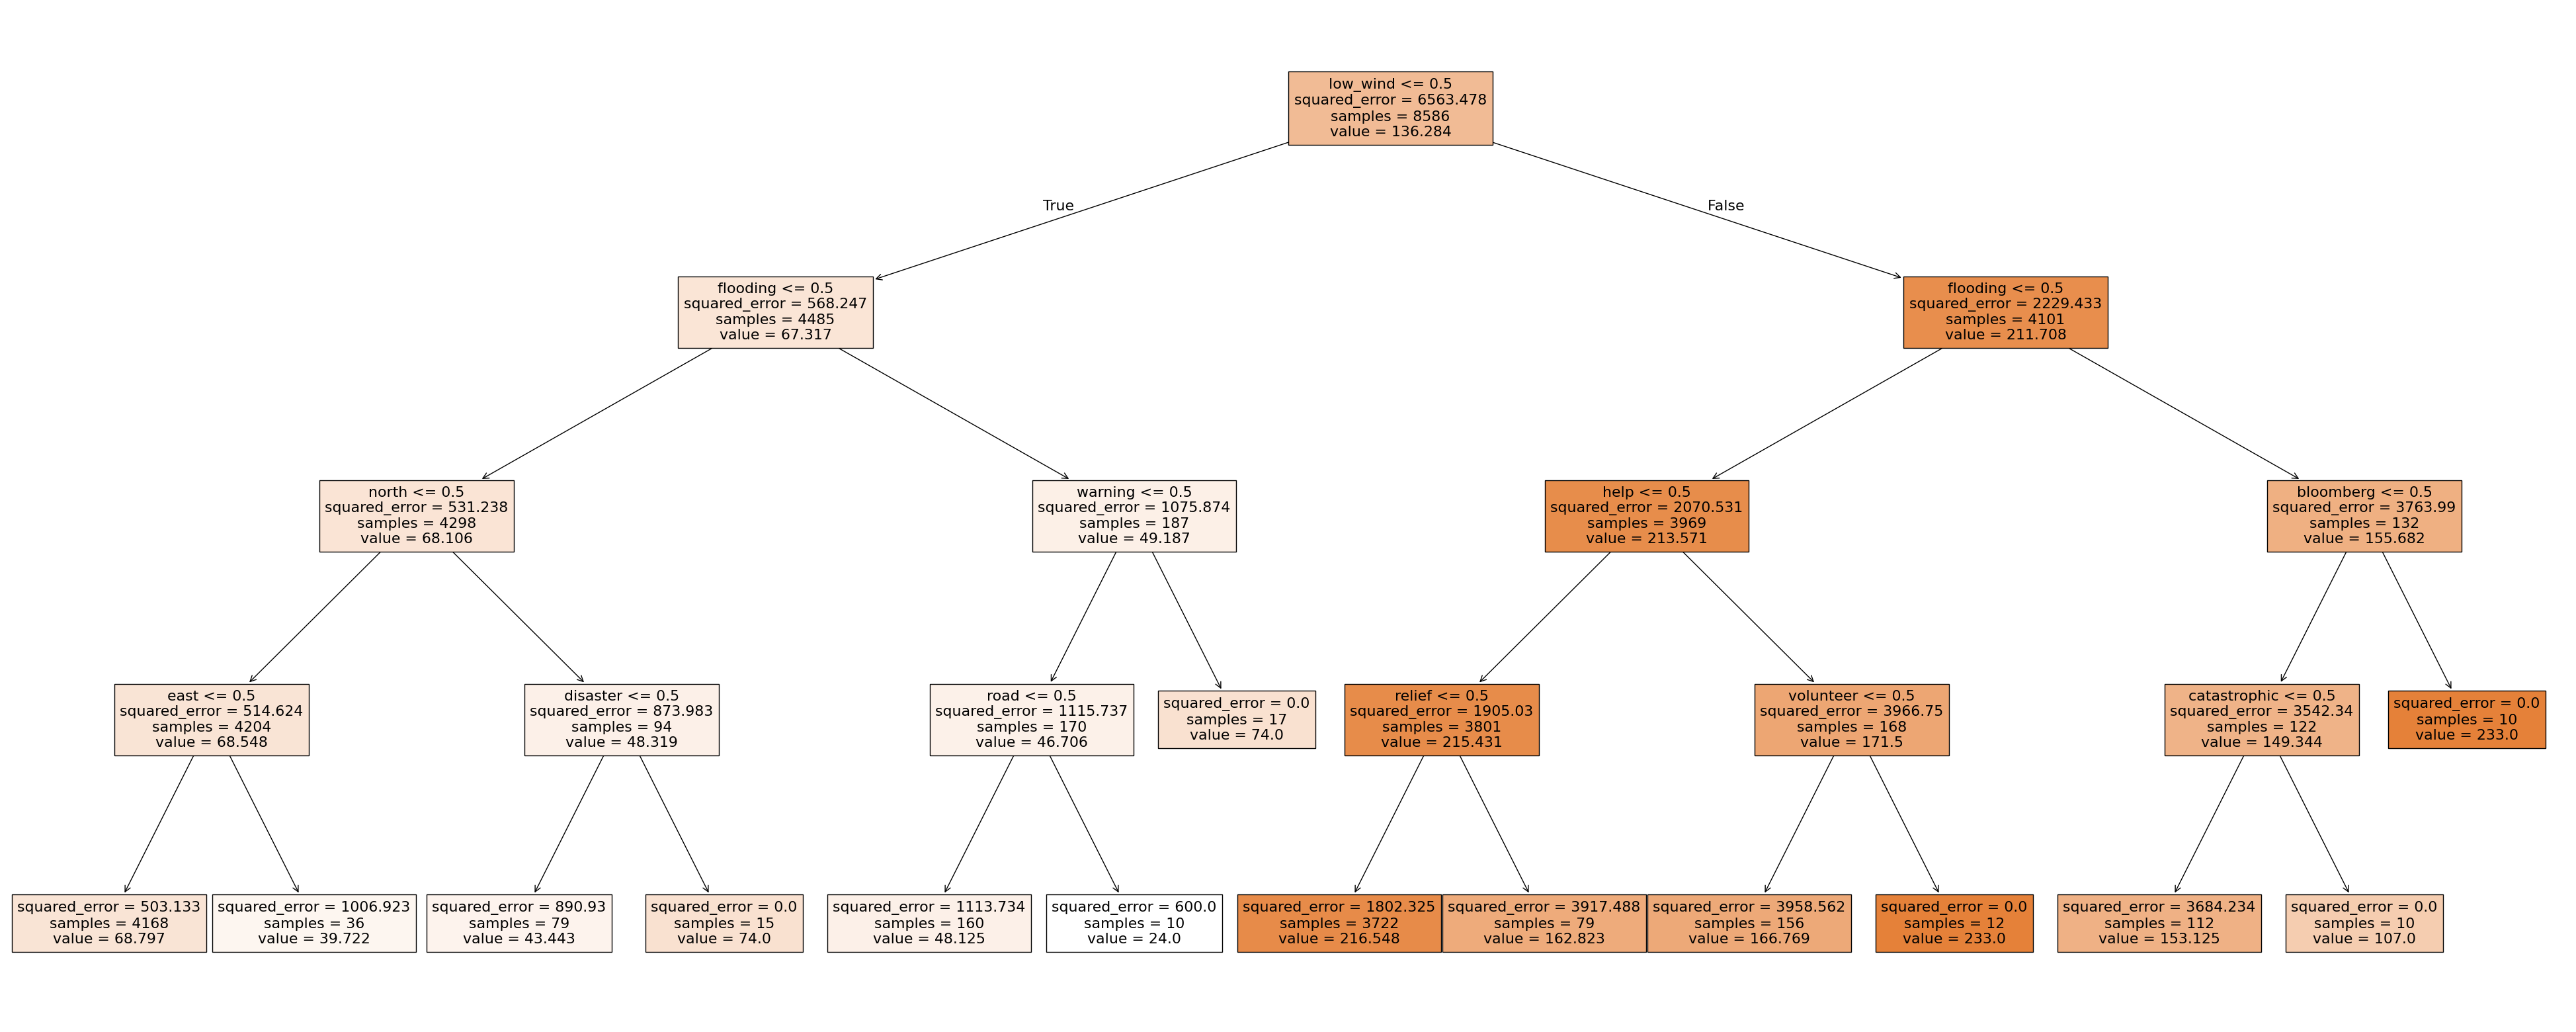

In [310]:
plt.figure(figsize=(50, 20))
plot_tree(regressor, filled=True, feature_names=X_df.columns, max_depth=8)
plt.savefig("decision_tree_wind.png", format='png', bbox_inches='tight')
plt.show()

In [311]:
# snippet generated by chatGPT
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [312]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_prediction)

35.47164070438742

In [313]:
mean_absolute_percentage_error(y_test, y_prediction)

105.64328026104444

In [314]:
regressor.score(X_test, y_test)

0.8086531303960676

In [315]:
###########################################################################################################################################

In [316]:
###########################################################################################################################################

In [317]:
###########################################################################################################################################

In [318]:
# Remember to close the session! 
session.close()

OperationalError: (psycopg2.OperationalError) server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.

(Background on this error at: https://sqlalche.me/e/20/e3q8)